# DATA ANALYSIS

In [89]:
%pip install mplcursors 

Note: you may need to restart the kernel to use updated packages.


In [90]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import pacmap
import numpy as np
import csv
import matplotlib.pyplot as plt
import json
import re
from matplotlib.colors import Normalize
import mplcursors


In [91]:
with open('../Data/sequences.csv', 'r') as f:
    reader = csv.reader(f)
    sequences = list(reader)

In [92]:
f = open('../Data/data.json')
data = json.load(f)

a = open('../Data/added_data.json')
added_data = json.load(a)

In [93]:
model= word2vec.Word2Vec.load('../Data/Models/model_5e_100d.model')

In [94]:
# Create a dictionary to map addresses to their corresponding embeddings
journey_embeddings = {}
for journey in sequences:
    for place in journey:
        try:
            journey_id = place  # Convert the journey list to a tuple to use as a dictionary key
            journey_embeddings[journey_id] = model.wv[journey_id]
        except KeyError:
            # Handle cases where the journey is not present in the Word2Vec model
            pass

# Convert dictionary to numpy array
X = np.array(list(journey_embeddings.values()))

# Create a list of all addresses
journey_ids = list(journey_embeddings.keys())

# Create a dictionary mapping addresses to their index in the numpy array
journey_idx = {journey_id: idx for idx, journey_id in enumerate(journey_ids)}

In [95]:
X = model.wv.vectors

#pacmap
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_pacmap = embedding.fit_transform(X, init="pca")

# tsne
def tsne_plot(X):
    X=np.array(X)
    proj = TSNE(perplexity=20).fit_transform(X)
    return proj
proj_tsne=tsne_plot(X)

# UMAP 
proj_umap = umap.UMAP(n_components=2, n_neighbors=20, metric='cosine').fit_transform(X)

# pca 
pca = PCA(n_components=2)
proj_pca=pca.fit_transform(X)


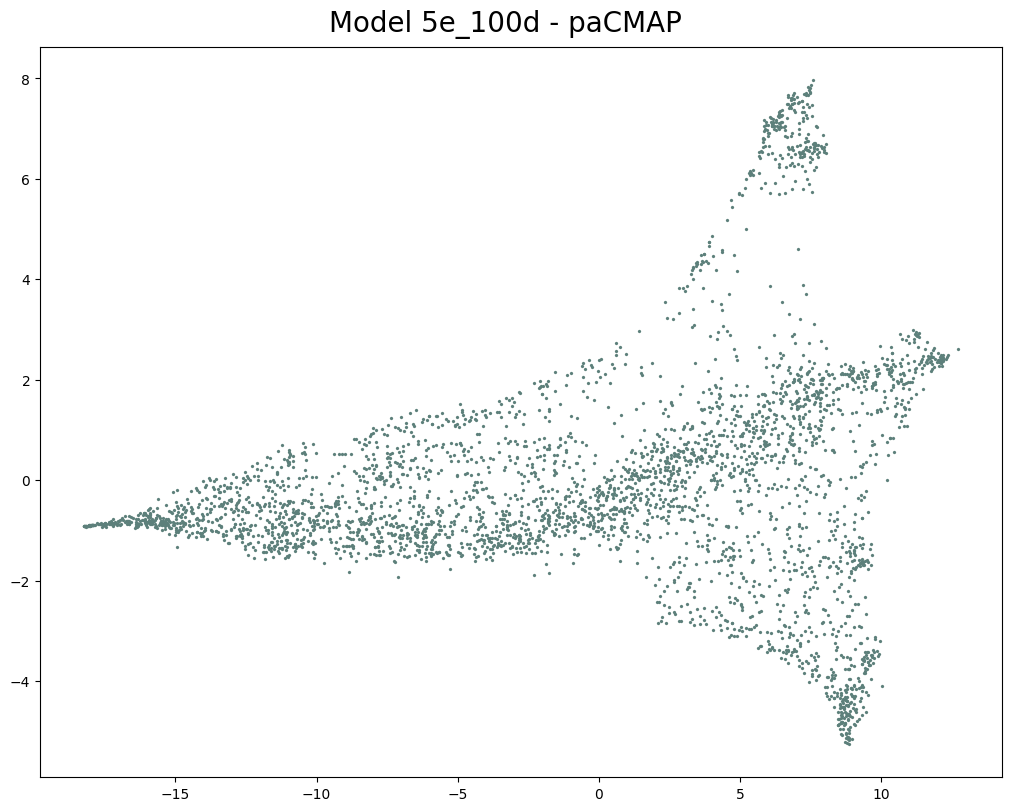

In [96]:

fig, ax = plt.subplots(1, 1, figsize=(10, 8), layout="constrained")

#Plot all city
plt.scatter(
    [proj_pacmap[journey_idx[journey_id]][0] for journey_id in journey_ids],
    [proj_pacmap[journey_idx[journey_id]][1] for journey_id in journey_ids],
    lw=0.1, s=5, marker='o', c="#5D807B"
)

fig.suptitle('Model 5e_100d - paCMAP', fontsize=20)

plt.show()

_____________________________________________________________________

# COUNT

In [97]:
counts_to_labels = {100: '0-100', 1000: '101-1000', 5000: '1001-5000', 10000: '5001-10000', 50000: '10000-50000', 100000: '50001-100000', 100001: '100000+'}

In [98]:
address_count_seq = {}
for seq in sequences:
    for place in seq:
        if place in address_count_seq:
            address_count_seq[place] += 1
        else:
            address_count_seq[place] = 1


from collections import Counter

# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
address_counts = Counter(address_count_seq.values())

# Sort the counts by their keys (number of mentions), in descending order
sorted_counts = sorted(address_counts.items(), key=lambda x: x[0], reverse=True)

In [99]:

address_cluster_count = {}

for address in address_count_seq.keys():
      count = address_count_seq[address]
      if 0 <= count <= 100:
         address_cluster_count[address] = 100
      elif 101 <= count <= 1000:
         address_cluster_count[address] = 1000
      elif 1001 <= count <= 5000:
         address_cluster_count[address] = 5000
      elif 5001 <= count <= 10000:
         address_cluster_count[address] = 10000
      elif 10001 <= count <= 50000:
         address_cluster_count[address] = 50000
      elif 50001 <= count <= 100000:
         address_cluster_count[address] = 100000
      elif 100001 <= count:
         address_cluster_count[address] = 100001
      else:
         print("address was: ", address)
         address_cluster_count[address] = 0 


In [100]:
from collections import Counter

# Count occurrences of each zip code
count_counts = Counter(address_cluster_count.values())

# Print the zip code counts
for occurrence, count in sorted(count_counts.items()):
    print(f"Count {occurrence}: {count} occurrences")

Count 100: 4063 occurrences
Count 1000: 833 occurrences
Count 5000: 265 occurrences
Count 10000: 57 occurrences
Count 50000: 76 occurrences
Count 100000: 22 occurrences
Count 100001: 9 occurrences


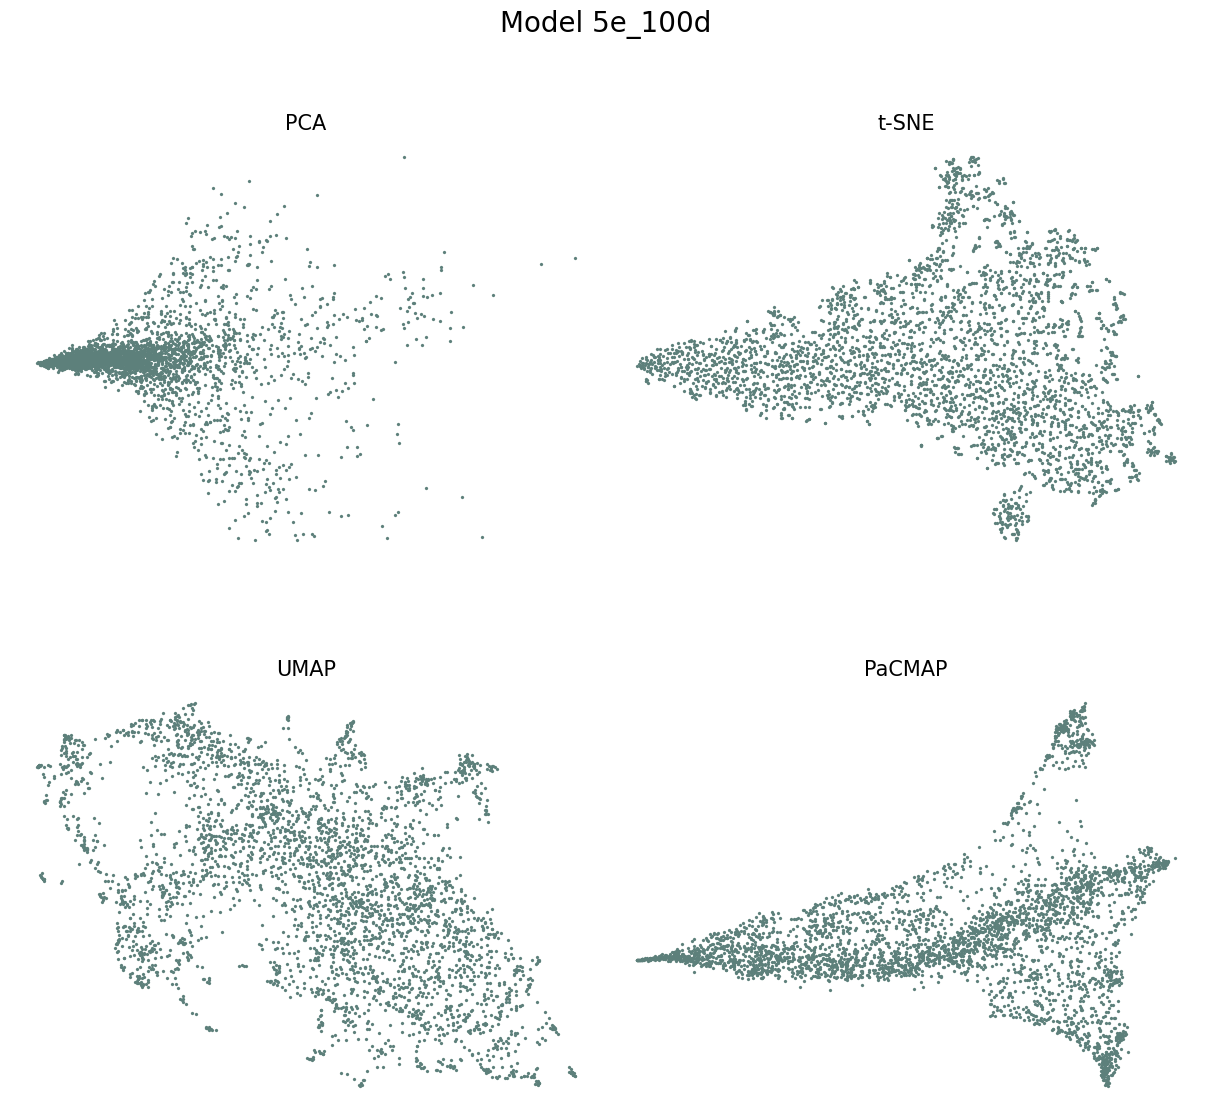

In [101]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=15)
        col.scatter(
            [xs[s][journey_idx[journey_id]][0] for journey_id in journey_ids],
            [xs[s][journey_idx[journey_id]][1] for journey_id in journey_ids],
            lw=0.1, s=5, c='#5D807B'
        )
        s += 1
        col.axis('off')

# Custom legend
fig.suptitle('Model 5e_100d', fontsize=20, y=1.1)
plt.show()


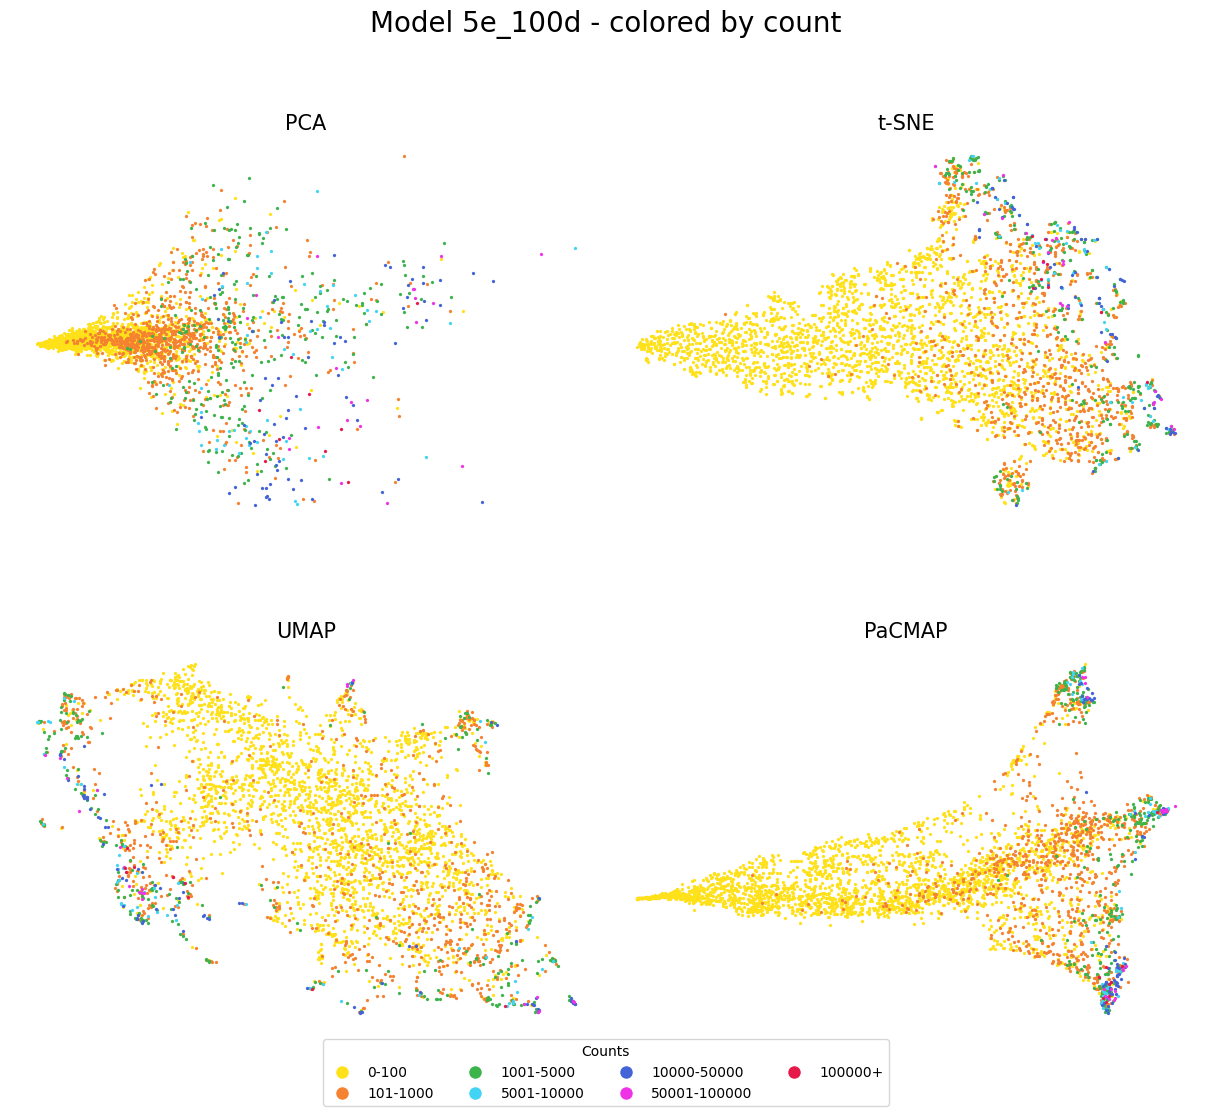

In [102]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=15)

        for current_count_code in unique_count_codes:
            relevant_addresses = []
            for address, count_code in address_cluster_count.items():
                if address in journey_ids:
                    if current_count_code == count_code:
                        relevant_addresses.append(address)

            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
            )
        #  # Add labels to stations makes it impossible to read 
        #     for journey_id in relevant_journeys_zip:
        #         x_coord = xs[s][journey_idx[journey_id]][0]
        #         y_coord = xs[s][journey_idx[journey_id]][1]
        #         col.text(x_coord, y_coord, journey_id, fontsize=8)  # Adjust fontsize as needed
            
        s += 1
        col.axis('off')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


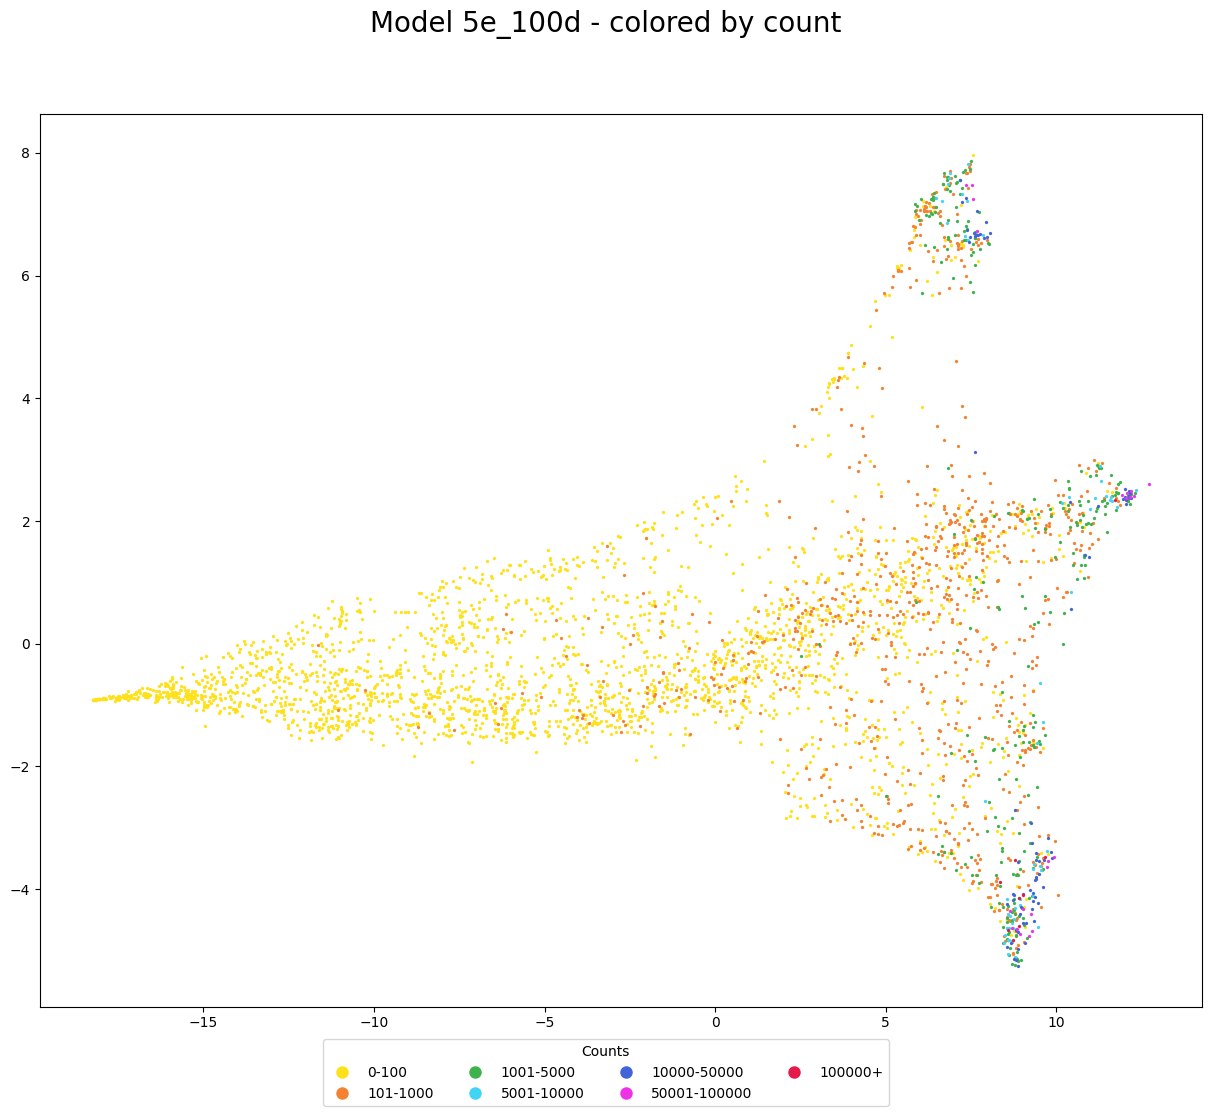

In [103]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(1, 1, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})


for current_count_code in unique_count_codes:
    relevant_addresses = []
    for address, count_code in address_cluster_count.items():
        if address in journey_ids:
            if current_count_code == count_code:
                relevant_addresses.append(address)

    relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
        lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
    )
# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


### Metro

In [104]:
stations_with_metro = []
for location in journey_ids:
    if '(Metro)' in location:
        stations_with_metro.append(location)

City = ["Nørrebro St. (Metro)", "Nørrebros Runddel St. (Metro)", "Nuuks Plads St. (Metro)", "Axelm Møllers Have St. (Metro)", 
      "Frederiksberg St. (Metro)", "Frederiksberg Allé St. (Metro)", "Enghave Plads St. (Metro)", "København H St. (Metro)", "København H (Metro)",
      "Rådhuspladsen St. (Metro)", "Gammel Strand St. (Metro)", "Kongens Nytorv St. (Metro)", "Marmorkirken St. (Metro)",
       "Østerport St. (Metro)", "Trianglen St. (Metro)", "Poul Henningsens Plads St. (Metro)", "Vibenhus Runddel St. (Metro)",
        "Skjolds Plads St. (Metro)", "Nordhavn St. (Metro)", "Orientkaj St. (Metro)"]

M1_2 = ["Vanløse St. (Metro)", "Flintholm St. (Metro)", "Lindevang St. (Metro)", "Fasanvej St. (Metro)", 
      "Frederiksberg St. (Metro)", "Forum St. (Metro)", "Nørreport St. (Metro)", "Kongens Nytorv St. (Metro)",
      "Christianshavn St. (Metro)"]
M1 = ["Islands Brygge St. (Metro)", "DR Byen St. (Metro)", "Sundby St. (Metro)", "Bella Center St. (Metro)", "Ørestad St. (Metro)", "Vestamager St. (Metro)"]
M2 = ["Amagerbro St. (Metro)", "Lergravsparken St. (Metro)", "Øresund St. (Metro)",
      "Amager Strand St. (Metro)", "Femøren St. (Metro)", "Kastrup St. (Metro)", "Københavns Lufthavn St. (Metro)"]

#color_to_metro= {"City": "Red", "M2": "Yellow", "M1": "Green", "M1_2": "Purple", "Metro": "Black"}
color_to_metro= {"Red": "City" , "Yellow":  "M2", "Green": "M1", "Purple": "M1_2"}

# Create the plots

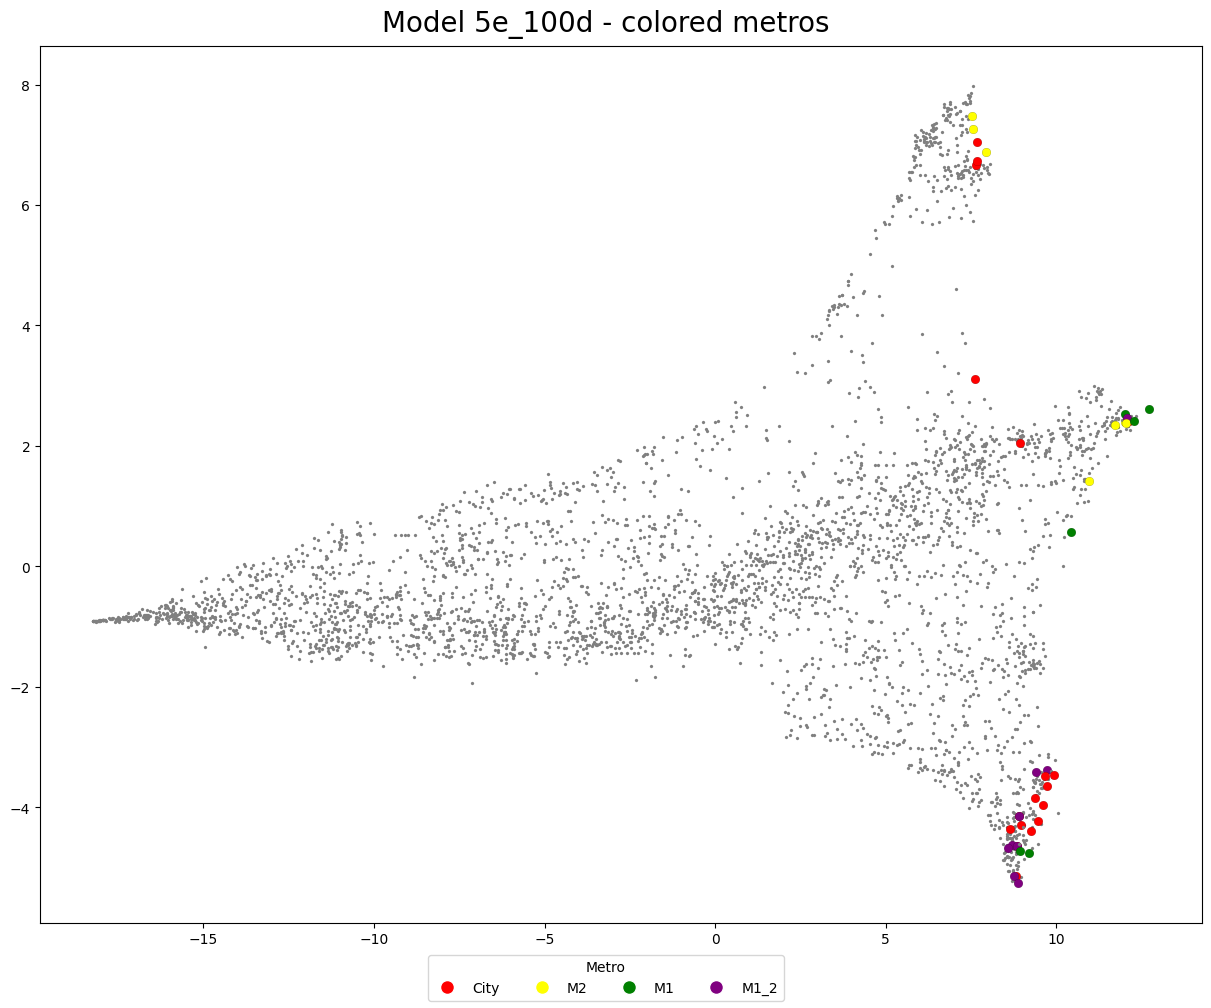

In [105]:
# Define color palette for zip codes
unique_metroes = color_to_metro.keys()
color_palette = ["Red", "Yellow", "Green", "Purple"]
colors = {}
for idx, metro in enumerate(unique_metroes):
    colors[metro] = color_palette[idx]


fig, ax = plt.subplots(1, 1, figsize=(12, 10), layout="constrained")


for current_count_code in unique_count_codes:
    relevant_addresses = []
    for address, count_code in address_cluster_count.items():
        if address in journey_ids:
            if current_count_code == count_code:
                relevant_addresses.append(address)

    relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
    #plot all without metro
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id not in stations_with_metro],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id not in stations_with_metro],
        lw=0.1, s=5, label=current_count_code, facecolor='grey'
    )

    # plt.scatter(
    #     [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in stations_with_metro],
    #     [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in stations_with_metro],
    #     lw=0.1, s=40, label=current_count_code, edgecolors='black', facecolor='none'
    # )

    #Plot all city
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in City],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in City],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Red', label="City"
    )

    #Plot all m1_2
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in M1_2],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in M1_2],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Purple', label="M1_2"
    )

    #Plot all m2
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in M2],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in M2],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Yellow', label="M2"
    )

      #Plot all m1
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in M1],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in M1],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Green', label="M1"
    )


# for journey_id in stations_with_metro:
#     x_coord = proj_pacmap[journey_idx[journey_id]][0]
#     y_coord = proj_pacmap[journey_idx[journey_id]][1]
#     plt.text(x_coord, y_coord, journey_id, fontsize=8)  # Adjust fontsize as needed

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=colors[metro], label=color_to_metro[metro]) for metro in unique_metroes]
fig.legend(handles= handles, loc="outside lower center", ncol=5, title='Metro')
fig.suptitle('Model 5e_100d - colored metros', fontsize=20)

plt.show()

_____________________________________________________________________

# ZIPCODES

In [106]:
def getZip(info):
    pattern_zip = '\d{4}'
    pattern_denmark = 'anmark'
    match_zip = re.search(pattern_zip, info)
    match_denmark = re.search(pattern_denmark, info)
    if match_zip is not None and match_denmark is not None:
        return match_zip.group()
    else :
        return
    

In [107]:
pattern = r'\d.*'

def get_modified (location):
    location = (re.sub(pattern, '', location)).strip()
    if location == '':
        return
    if location[-1] == '(':
        location = location[:-1]
    if location == 'Zoo':
        location = "Zoologisk Have"
    return location


In [108]:
address_cluster_zips = {}
address_more_cluster_zips = {}
address_kbh_cluster_zips = {}
zip_to_label = {'1000': 'Kbh K', '1700': 'Vesterbro', '2000': 'Frederiksberg', '2100': 'Østerbro', '2200': 'Nørrebro', 
                '2300': 'Kbh S', '2400': 'Kbh NV', '2500': 'Valby', '2600': 'Glostrup', '2700': 'Brønshøj', '2800': 'Lyngby', '2900': 'Hellerup', '2770': 'Kastrup'}
zip_to_label_clustered = {'2800': 'Nord', '1000': 'Midt', '2600': 'Vest', '2300' : 'Syd'}
zip_to_label_kbh_only = {'1000': 'Kbh K', '1500': 'Kbh V', '2100' : 'Kbh Ø', '2200' : 'Kbh N'}
wrong_addresses = []

In [109]:

for address, info in data.items():
    if info is not None: 
        zip_code = getZip(info['address'])  # Extract zip code from address can be empty
        if zip_code is not None:
            zip = int(zip_code)
            if 1000 <= zip <= 4999: #for now removing all failed zipcodes in Jylland
                if 1000 <= zip <= 1499:
                    #Kbh K
                    address_cluster_zips[address] = '1000'
                    address_more_cluster_zips[address] = '1000'
                    address_kbh_cluster_zips[address] = '1000'
                elif 1500 <= zip <= 1799:
                    #Kbh V
                    address_cluster_zips[address] = '1700'
                    address_more_cluster_zips[address] = '1000'
                    address_kbh_cluster_zips[address] = '1500'
                elif zip == 2000:
                    #Frederiksberg C
                    address_cluster_zips[address] = '2000'
                    address_more_cluster_zips[address] = '1000'
                    address_kbh_cluster_zips[address] = '1500'
                elif 2000 < zip < 2200: #2150 er Nordhavn
                    #Østerbro
                    address_cluster_zips[address] = '2100'
                    address_more_cluster_zips[address] = '1000'
                    address_kbh_cluster_zips[address] = '2100'
                elif 2200 <= zip < 2300:
                    #København N (Nørrebro)
                    address_cluster_zips[address] = '2200'
                    address_more_cluster_zips[address] = '1000'
                    address_kbh_cluster_zips[address] = '2200'
                elif 2300 <= zip < 2400:
                    #Amager Kbh S
                    address_cluster_zips[address] = '2300'
                    address_more_cluster_zips[address] = '2300'
                elif 2400 <= zip < 2500:
                    #Kbh NV
                    address_cluster_zips[address] = '2400'
                    address_more_cluster_zips[address] = '1000'
                elif 2500 <= zip < 2600:
                    #Valby
                    address_cluster_zips[address] = '2500'
                    address_more_cluster_zips[address] = '2300'
                elif 2600 <= zip < 2700:
                    #Glostrup
                    address_cluster_zips[address] = '2600'
                    address_more_cluster_zips[address] = '2600'
                elif zip == 2770 or zip == 2791:
                    #Kastrup Dragør
                    address_cluster_zips[address] = '2770'
                    address_more_cluster_zips[address] = '2300'
                elif 2700 <= zip < 2800:
                    #Brønshøj
                    address_cluster_zips[address] = '2700'
                    address_more_cluster_zips[address] = '1000'
                elif 2800 <= zip < 2900:
                    #Lyngby
                    address_cluster_zips[address] = '2800'
                    address_more_cluster_zips[address] = '2800'
                elif 2800 <= zip < 2900:
                    #Hellerup
                    address_cluster_zips[address] = '2900'
                    address_more_cluster_zips[address] = '2800'
            else: 
                wrong_addresses.append(address) #go through later


#run through the list of wrong addresses and try to find them in the added_data.json file to get the "correct" zipcode
for address in wrong_addresses:
    #find in json file
    if address in added_data:
        zip_code = getZip(added_data[address]['address'])
        if zip_code is not None:
            zip = int(zip_code)
            if 1000 <= zip <= 4999: #for now removing all failed zipcodes in Jylland
                if 1000 <= zip <= 1499:
                    #Kbh K
                    address_cluster_zips[address] = '1000'
                    address_more_cluster_zips[address] = '1000'
                    address_kbh_cluster_zips[address] = '1000'
                elif 1500 <= zip <= 1799:
                    #Kbh V
                    address_cluster_zips[address] = '1700'
                    address_more_cluster_zips[address] = '1000'
                    address_kbh_cluster_zips[address] = '1500'
                elif zip == 2000:
                    #Frederiksberg C
                    address_cluster_zips[address] = '2000'
                    address_more_cluster_zips[address] = '1000'
                    address_kbh_cluster_zips[address] = '1500'
                elif 2000 < zip < 2200: #2150 er Nordhavn
                    #Østerbro
                    address_cluster_zips[address] = '2100'
                    address_more_cluster_zips[address] = '1000'
                    address_kbh_cluster_zips[address] = '2100'
                elif 2200 <= zip < 2300:
                    #København N (Nørrebro)
                    address_cluster_zips[address] = '2200'
                    address_more_cluster_zips[address] = '1000'
                    address_kbh_cluster_zips[address] = '2200'
                elif 2300 <= zip < 2400:
                    #Amager Kbh S
                    address_cluster_zips[address] = '2300'
                    address_more_cluster_zips[address] = '2300'
                elif 2400 <= zip < 2500:
                    #Kbh NV
                    address_cluster_zips[address] = '2400'
                    address_more_cluster_zips[address] = '1000'
                elif 2500 <= zip < 2600:
                    #Valby
                    address_cluster_zips[address] = '2500'
                    address_more_cluster_zips[address] = '2300'
                elif 2600 <= zip < 2700:
                    #Glostrup
                    address_cluster_zips[address] = '2600'
                    address_more_cluster_zips[address] = '2600'
                elif zip == 2770 or zip == 2791:
                    #Kastrup Dragør
                    address_cluster_zips[address] = '2770'
                    address_more_cluster_zips[address] = '2300'
                elif 2700 <= zip < 2800:
                    #Brønshøj
                    address_cluster_zips[address] = '2700'
                    address_more_cluster_zips[address] = '1000'
                elif 2800 <= zip < 2900:
                    #Lyngby
                    address_cluster_zips[address] = '2800'
                    address_more_cluster_zips[address] = '2800'
                elif 2800 <= zip < 2900:
                    #Hellerup
                    address_cluster_zips[address] = '2900'
                    address_more_cluster_zips[address] = '2800'

In [110]:
from collections import Counter

# Count occurrences of each zip code
zip_code_counts = Counter(address_cluster_zips.values())

# Print the zip code counts
for zip_code, count in zip_code_counts.items():
    print(f"Zip code {zip_code}: {count} addresses")

Zip code 2100: 3345 addresses
Zip code 2400: 3539 addresses
Zip code 1000: 3995 addresses
Zip code 2300: 6497 addresses
Zip code 2500: 2205 addresses
Zip code 1700: 2522 addresses
Zip code 2770: 2999 addresses
Zip code 2800: 413 addresses
Zip code 2000: 1921 addresses
Zip code 2200: 2916 addresses
Zip code 2700: 2554 addresses
Zip code 2600: 797 addresses


In [111]:
# New dictionary to store modified keys and their corresponding zip codes
modified_address_cluster_zips = {}

# Iterate through the keys, apply regex operation, and update the new dictionary
for address, zipcode in address_cluster_zips.items():
    new_address = get_modified(address)
    modified_address_cluster_zips[new_address] = zipcode


/var/folders/z3/0j97vknj4696wz9q6_jg32240000gn/T/ipykernel_1120/621047253.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplcursors/_pick_info.py:55: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



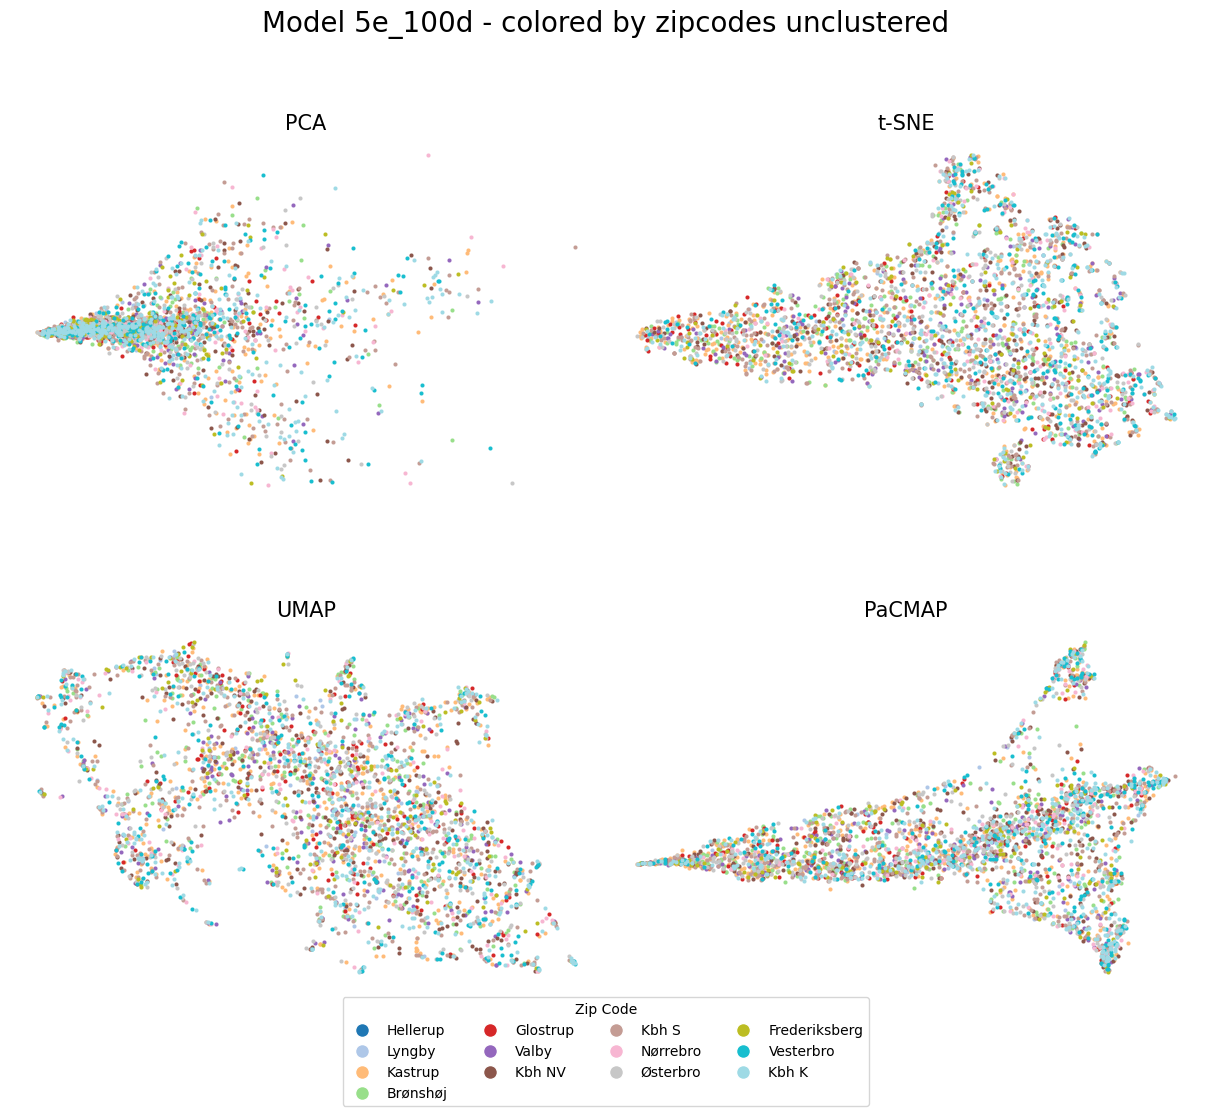

In [112]:

zip_colors = {}  # Dictionary to map zip codes to colors
unique_zip_codes = sorted(zip_to_label.keys(), reverse=True)
num_colors = len(unique_zip_codes) 
color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap

for idx, zip_code in enumerate(unique_zip_codes):
    zip_colors[zip_code] = color_palette(idx)

# Create the plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

#should be two times two
for row in ax:
    for col in row:
        #print("One plot")
        col.set_title(ts[s], fontsize=15)
        # # Filter journeys by field

        for current_zip_code in unique_zip_codes:
            # Plot all journeys for each zip code
            relevant_addresses = []
            for address, zip_code in modified_address_cluster_zips.items():
                if address in journey_ids:
                    if current_zip_code == zip_code:
                        relevant_addresses.append(address)

            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=8, label=current_zip_code, c=zip_colors[current_zip_code]
            )
        s += 1
        col.axis('off')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=zip_colors[zip_code], label=zip_to_label[zip_code]) for zip_code in unique_zip_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Zip Code')
fig.suptitle('Model 5e_100d - colored by zipcodes unclustered', fontsize=20, y=1.1)
plt.show()


### More clustered

In [113]:
# New dictionary to store modified keys and their corresponding zip codes
modified_address_cluster_zips = {}

# Iterate through the keys, apply regex operation, and update the new dictionary
for address, zipcode in address_more_cluster_zips.items():
    new_address = get_modified(address)
    modified_address_cluster_zips[new_address] = zipcode


/var/folders/z3/0j97vknj4696wz9q6_jg32240000gn/T/ipykernel_1120/2470452665.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



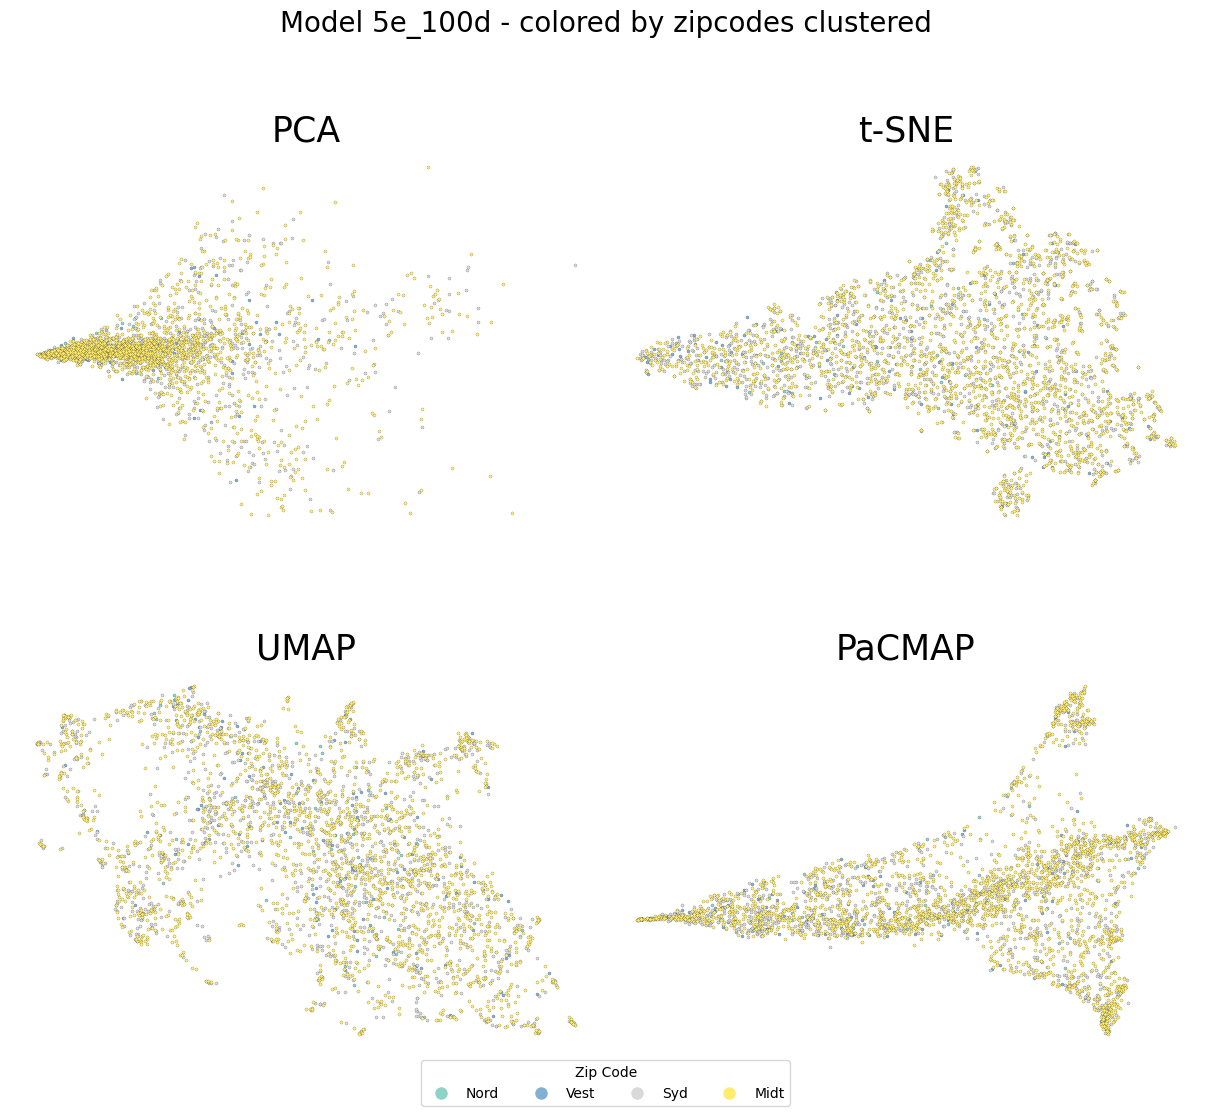

In [114]:

zip_colors = {}  # Dictionary to map zip codes to colors
unique_zip_codes = sorted(zip_to_label_clustered.keys(), reverse=True)
num_colors = len(unique_zip_codes) #change this
color_palette = plt.cm.get_cmap('Set3', num_colors)  # Choose a colormap

for idx, zip_code in enumerate(unique_zip_codes):
    zip_colors[zip_code] = color_palette(idx)

fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=25)
        for current_zip_code in unique_zip_codes:
            # Plot all journeys for each zip code
            relevant_addresses = []
            for address, zip_code in modified_address_cluster_zips.items():
                if address in journey_ids:
                    if current_zip_code == zip_code:
                        relevant_addresses.append(address)
            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=5, label=current_zip_code, edgecolors='black',  c=zip_colors[current_zip_code]
            )

        s += 1
        col.axis('off')

# Custom legend

handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=zip_colors[zip_code], label=zip_to_label_clustered[zip_code]) for zip_code in unique_zip_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Zip Code')
fig.suptitle('Model 5e_100d - colored by zipcodes clustered', fontsize=20, y=1.1)
plt.show()


In [115]:
Counter(modified_address_cluster_zips.values())

Counter({'1000': 2279, '2300': 1379, '2600': 312, '2800': 153})

#### CLUSTER KBH

In [116]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

zip_colors = {}  # Dictionary to map zip codes to colors
unique_zip_codes = sorted(zip_to_label_kbh_only.keys(), reverse=True)
num_colors = len(unique_zip_codes) #change this
color_palette = ['#ffe119', '#3cb44b', '#42d4f4','#e6194b']

for idx, zip_code in enumerate(unique_zip_codes):
    zip_colors[zip_code] = color_palette[idx]


for idx, count_code in enumerate(unique_zip_codes):
    count_colors[count_code] = color_palette[idx]  # Use modulo to cycle through the color palette

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

df['Zip'] = df['Station Name'].map(address_kbh_cluster_zips)

# Map zip to colors
df['Color'] = df['Zip'].map(count_colors)


import plotly.graph_objects as go

# Create traces for each unique color
legend_traces = []
for zip_code, color in count_colors.items():
    # Filter DataFrame to include only rows with the current count_code
    filtered_df = df[df['Zip'] == zip_code]
    # Create a scatter trace for this color
    trace = go.Scatter(
        x=filtered_df['Dimension 1'],
        y=filtered_df['Dimension 2'],
        mode='markers',
        marker=dict(color=color),
        name=str(zip_code),  # Use count_code as legend label
        hoverinfo='text',  # Show text on hover
        text=filtered_df['Station Name'] + ' (' + filtered_df['Zip'].astype(str) + ')',  # Concatenate station name and count
    )
    legend_traces.append(trace)

# Add the scatter traces to the figure
fig = go.Figure(data=legend_traces)

# Update the layout
fig.update_layout(
    title="PaCMAP Visualization",
    height=800  # Set the height of the plot (in pixels)
)

# Show the plot
fig.show()



_____________________________________________________________________

# SIMILARITY - EMBEDDING VALIDATION

In [117]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming X is your embeddings_matrix
embeddings_matrix = X.shape

# Calculate cosine similarity matrix between station vectors
similarity_matrix = cosine_similarity(X)

highest = -1
for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        if i != j and similarity_matrix[i, j] > highest:
            highest = similarity_matrix[i, j]

print(highest)

# Find the indices of the maximum similarity score in the updated matrix
max_indices = np.argwhere(similarity_matrix == highest)

# Extract the indices of the most similar pair
most_similar_pair_indices = max_indices[0]

# Get the station names corresponding to the indices
station_names = model.wv.index_to_key
station_i_name = station_names[most_similar_pair_indices[0]]
station_j_name = station_names[most_similar_pair_indices[1]]

# Print the names of the two most similar stations
print(f"The two most similar stations (not the same) are: {station_i_name} and {station_j_name}")

# # X is your numpy array containing the embedding vectors. Each row of X represents a vector in the embedding space.
# # cosine_similarity(X) computes the cosine similarity between all pairs of vectors in X.
# # The resulting similarity_matrix is a symmetric matrix where each element similarity_matrix[i, j] represents the cosine similarity between vectors X[i] and X[j].
# # After calculating the cosine similarity matrix, you can proceed to perform clustering or any other analysis based on the similarity values.

0.9905597
The two most similar stations (not the same) are: Køge St. and Thorupgård Allé


### København H validation on cosine embedding

In [118]:
list_lbh_sim = model.wv.similar_by_key('København H', topn=4000)

kbh_to_sim = {"København H": 1.0}
for location, sim in list_lbh_sim:
    kbh_to_sim[location] = sim

kbh_to_sim

{'København H': 1.0,
 'Axeltorv': 0.7438591718673706,
 'Banegårdspladsen': 0.7147773504257202,
 'Tietgensgade': 0.7139832377433777,
 'Vestergade': 0.6945743560791016,
 'Bernstorffsgade': 0.6939112544059753,
 'Vester Voldgade': 0.6863526701927185,
 'DGI Byen': 0.683293879032135,
 'Hammerichsgade': 0.6667801737785339,
 'Istedgade': 0.658430814743042,
 'Halmtorvet': 0.6516885757446289,
 'Reventlowsgade': 0.6504085659980774,
 'Trommesalen': 0.6448825001716614,
 'Vodroffs Tværgade': 0.6420493125915527,
 'Østergade': 0.6205928921699524,
 'Nygade': 0.6191301345825195,
 'København H (Metro)': 0.6124704480171204,
 'Gammeltorv': 0.6101997494697571,
 'Rådhusstræde': 0.6089519262313843,
 'Frederiksberggade': 0.6081905364990234,
 'Knabrostræde': 0.6081708669662476,
 'Krystalgade': 0.6062605381011963,
 'Niels Ebbesens Vej': 0.6061654686927795,
 'Ingerslevsgade': 0.6023964285850525,
 'Studiestræde': 0.6016766428947449,
 'Nørre Søgade': 0.5978189706802368,
 'Maltagade': 0.5945670008659363,
 'Sankt Jør

low Den Ukrainske Ambassade    0.01666565053164959
high København H    1.0


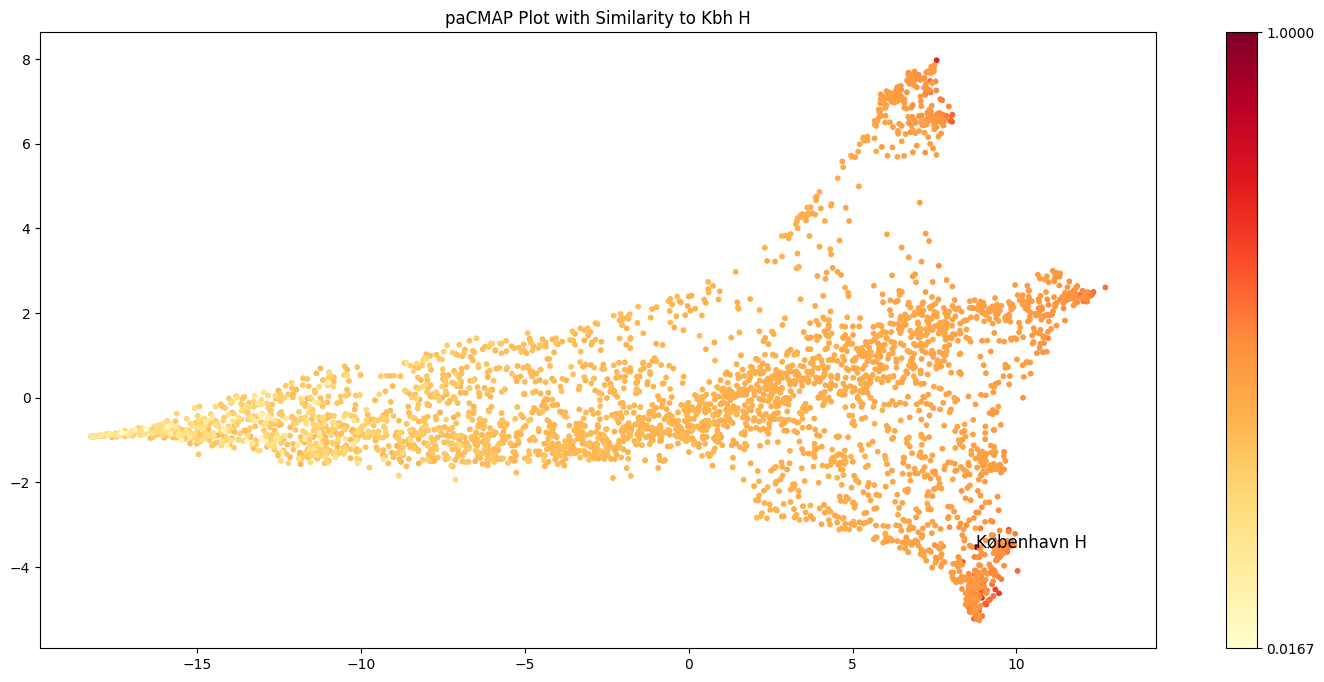

In [119]:

station_names = kbh_to_sim.keys()
# Get the first element
low_key, low_value = list(kbh_to_sim.items())[-1]
high_key, high_value = next(iter(kbh_to_sim.items()))

print("low", low_key, "  ", low_value)
print("high", high_key, "  ", high_value)
norm = Normalize(vmin=low_value, vmax=high_value)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

grayscale_values = [(kbh_to_sim[station]) for station in station_names]
# Plot the stations using paCMAP with grayscale colors
scatter = plt.scatter(proj_pacmap[:, 0], proj_pacmap[:, 1], c=grayscale_values, cmap='YlOrRd', s=10, alpha=1.0)

# Set the colorbar
colorbar = plt.colorbar(scatter, ax=ax)

# Manually set colorbar ticks and labels
colorbar.set_ticks([high_value, low_value])  # Adjust these as needed based on your scale

kbh_idx = journey_idx['København H']
#ADD LABEL TO JUST KØBENHAVN H
plt.text(proj_pacmap[kbh_idx, 0], proj_pacmap[kbh_idx, 1], 'København H', fontsize=12, ha='left')

plt.title('paCMAP Plot with Similarity to Kbh H')
plt.show()


### Rued Langgaards Vej validation on cosine embedding

In [120]:
list_rued_sim = model.wv.similar_by_key('Rued Langgaards Vej', topn=4000)

rued_to_sim = {"Rued Langgaards Vej": 1.0}
for location, sim in list_rued_sim:
    rued_to_sim[location] = sim

rued_to_sim

{'Rued Langgaards Vej': 1.0,
 'Krokodillegade': 0.941950261592865,
 'Gunløgsgade': 0.929219663143158,
 'Smørumvej': 0.9236794114112854,
 'Dæmningen': 0.9234192967414856,
 'Vennemindevej': 0.9221628308296204,
 'Fælledparken Skatepark': 0.9207092523574829,
 'Mosesvinget': 0.9200780391693115,
 'Det Nye Emdrupborg Kollegium': 0.9198076128959656,
 'Dyssegårdsvej': 0.918389618396759,
 'Adolph Steens Alle': 0.9172426462173462,
 'Bispebjerg Parkallé': 0.9136267304420471,
 'Mosevangen': 0.9121113419532776,
 'Druehaven': 0.911362886428833,
 'Gustav Johannsens Vej': 0.9113001823425293,
 'Skyttegårdvej': 0.9112046957015991,
 'Charlotte Muncks Vej': 0.9107897877693176,
 'Kagsbro': 0.9102784395217896,
 'Plantevej': 0.9101508259773254,
 'Junggreensvej': 0.9092990756034851,
 'Rigensgade': 0.9092826247215271,
 'Ole Maaløes Vej': 0.9078429937362671,
 'Kærskiftevej': 0.9077015519142151,
 'Heinesgade': 0.9075583815574646,
 'Adriansvej': 0.9074336290359497,
 'Sankt Markus Plads': 0.9061188101768494,
 'Valb

low Rued Langgaards Vej    1.0
high Den Ukrainske Ambassade    0.06156621500849724


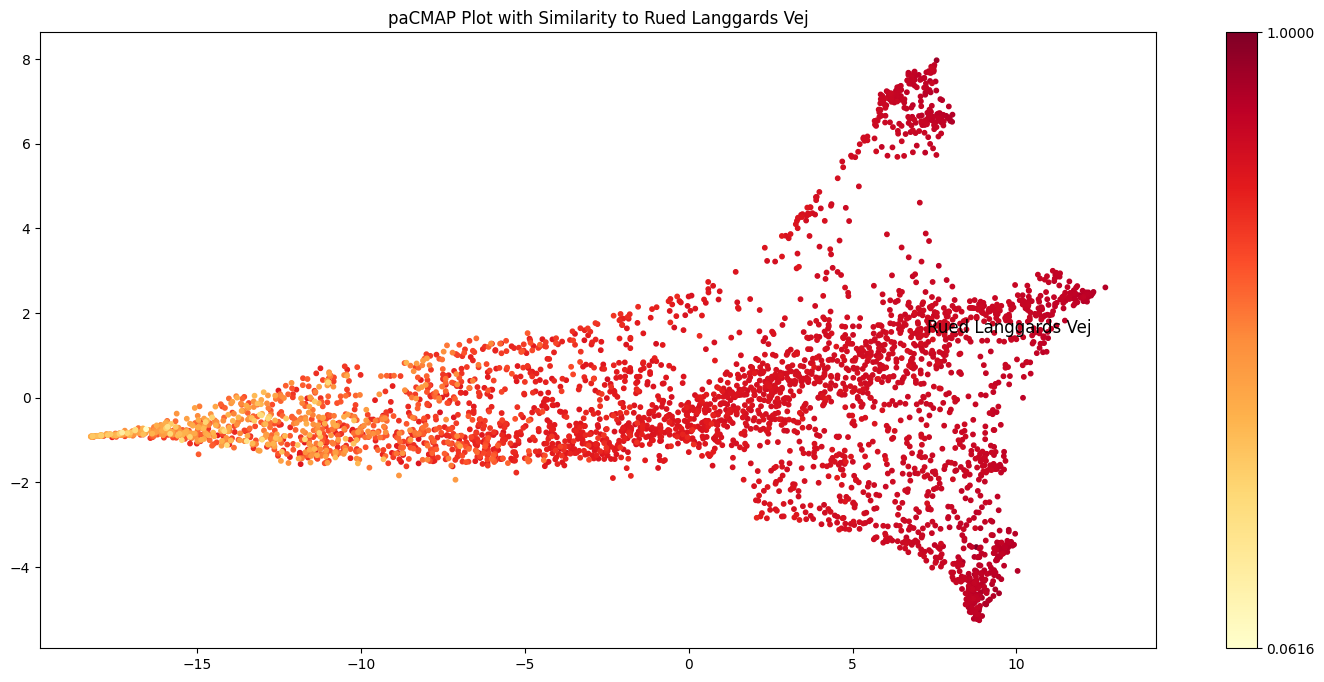

In [121]:

station_names = rued_to_sim.keys()
# Get the first element
low_key, low_value = next(iter(rued_to_sim.items()))
high_key, high_value = list(rued_to_sim.items())[-1]

print("low", low_key, "  ", low_value)
print("high", high_key, "  ", high_value)
norm = Normalize(vmin=low_value, vmax=high_value)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

grayscale_values = [(rued_to_sim[station]) for station in station_names]
# Plot the stations using paCMAP with grayscale colors
scatter = plt.scatter(proj_pacmap[:, 0], proj_pacmap[:, 1], c=grayscale_values, cmap='YlOrRd', s=10, alpha=1.0)

# Set the colorbar
colorbar = plt.colorbar(scatter, ax=ax)

# Manually set colorbar ticks and labels
colorbar.set_ticks([high_value, low_value])  # Adjust these as needed based on your scale


rued_idx = journey_idx['Rued Langgaards Vej']
#ADD LABEL TO JUST RUED LANGGAARDS VEJ
plt.text(proj_pacmap[rued_idx, 0], proj_pacmap[rued_idx, 1], 'Rued Langgards Vej', fontsize=12, ha='left')

plt.title('paCMAP Plot with Similarity to Rued Langgards Vej')
plt.show()


### Æblehaven validation on cosine embedding

In [122]:
list_æble_sim = model.wv.similar_by_key('Æblehaven', topn=4000)

æble_to_sim = {"Æblehaven": 1.0}
for location, sim in list_æble_sim:
    æble_to_sim[location] = sim

æble_to_sim

{'Æblehaven': 1.0,
 'Martin Luther Kings Vej': 0.9464658498764038,
 'V.A. Borgens Vej': 0.9420552253723145,
 'Marguerite Vibys Plads': 0.9386144876480103,
 'Skoubogade': 0.9379590153694153,
 'Støbegodsvej': 0.9366241693496704,
 'Nobis Hotel': 0.9366217851638794,
 'Lauravej': 0.9359109997749329,
 'Lykkesholms Allé': 0.9359049797058105,
 'Prins Constantins Vej': 0.9356565475463867,
 'Vor Frelsers Kirke': 0.9331955313682556,
 'Ved Kanalen': 0.9329544305801392,
 'Langøgade': 0.9327868223190308,
 'Vestbanevej': 0.9324917197227478,
 'Kulturhuset Indre By': 0.932479739189148,
 'Bratskovvej': 0.9310116767883301,
 'Krügersgade': 0.9308428168296814,
 'Priorvej': 0.9302312731742859,
 'Allersgade': 0.9299588799476624,
 'Kvæsthusbroen': 0.9293764233589172,
 'Hothers Plads': 0.9290462732315063,
 'Grundtvigsvej': 0.9289167523384094,
 'Brysselgade': 0.9286782145500183,
 'Nærumgade': 0.9283057451248169,
 'Gartnerivej': 0.9276339411735535,
 'Tivolislottet': 0.9263295531272888,
 'Lindebugten': 0.92617779

low Den Ukrainske Ambassade    0.10392951965332031
high Æblehaven    1.0


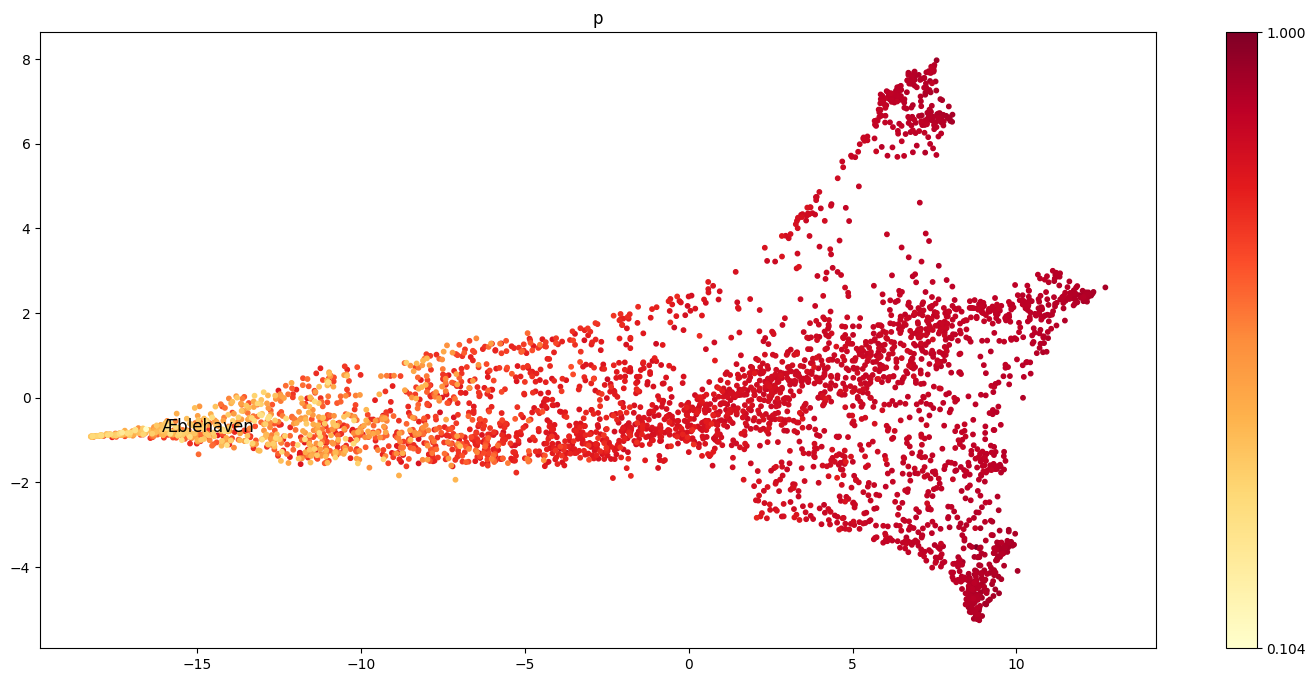

In [123]:

station_names = æble_to_sim.keys()
# Get the first element
low_key, low_value = list(æble_to_sim.items())[-1]
high_key, high_value = next(iter(æble_to_sim.items()))

print("low", low_key, "  ", low_value)
print("high", high_key, "  ", high_value)
norm = Normalize(vmin=low_value, vmax=high_value)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

grayscale_values = [(æble_to_sim[station]) for station in station_names]
scatter = plt.scatter(proj_pacmap[:, 0], proj_pacmap[:, 1], c=grayscale_values, cmap='YlOrRd', s=10, alpha=1.0)

# Set the colorbar
colorbar = plt.colorbar(scatter, ax=ax)

# Manually set colorbar ticks and labels
colorbar.set_ticks([high_value, low_value])  # Adjust these as needed based on your scale

æble_idx = journey_idx['Æblehaven']
#ADD LABEL TO JUST RUED LANGGAARDS VEJ
plt.text(proj_pacmap[æble_idx, 0], proj_pacmap[æble_idx, 1], 'Æblehaven', fontsize=12, ha='left')

plt.title('p')
plt.show()


__________________________________________________________________________________________________________________________________________________________

# CHOOSING MODEL AND DIMENSIONS


In [124]:
model_10000_100=word2vec.Word2Vec.load('../Data/Models/model_10000e_100d.model')
model_10000_100_lowest=word2vec.Word2Vec.load('../Data/Models/model_10000e_100d_lowest_loss.model')
model_2000_300=word2vec.Word2Vec.load('../Data/Models/best_model_new.model') 
model_2000_100=word2vec.Word2Vec.load('../Data/Models/model_5325_locations_2000e.model')
model_50_300=word2vec.Word2Vec.load('../Data/Models/model_5325_locations_50e_300d.model')
model_50_100=word2vec.Word2Vec.load('../Data/Models/model_5325_locations_50e_100d.model')
model_10_100= word2vec.Word2Vec.load('../Data/Models/model_10e_100d.model')
model_5_100= word2vec.Word2Vec.load('../Data/Models/model_5e_100d.model')
model_2_100= word2vec.Word2Vec.load('../Data/Models/model_2e_100d.model')
model_1_100= word2vec.Word2Vec.load('../Data/Models/model_1e_100d.model')

Plotting all models with paCMAP

In [125]:
X = model_10000_100.wv.vectors
embedding_10000_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_10000_100 = embedding_10000_100.fit_transform(X, init="pca")

X1 = model_10000_100_lowest.wv.vectors
embedding_10000_100_lowest = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_10000_100_lowest = embedding_10000_100_lowest.fit_transform(X1, init="pca")

X2 = model_2000_300.wv.vectors
embedding_2000_300 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_2000_300 = embedding_2000_300.fit_transform(X2, init="pca")

X3 = model_2000_100.wv.vectors
embedding_2000_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_2000_100 = embedding_2000_100.fit_transform(X3, init="pca")

X4 = model_50_300.wv.vectors
embedding_50_300 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_50_300 = embedding_50_300.fit_transform(X4, init="pca")

X5 = model_50_100.wv.vectors
embedding_50_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_50_100 = embedding_50_100.fit_transform(X5, init="pca")

X6 = model_10_100.wv.vectors
embedding_10_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_10_100 = embedding_10_100.fit_transform(X6, init="pca")

X7 = model_5_100.wv.vectors
embedding_5_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_5_100 = embedding_5_100.fit_transform(X7, init="pca")

X8 = model_2_100.wv.vectors
embedding_2_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_2_100 = embedding_2_100.fit_transform(X8, init="pca")

X9 = model_1_100.wv.vectors
embedding_1_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_1_100 = embedding_1_100.fit_transform(X9, init="pca")


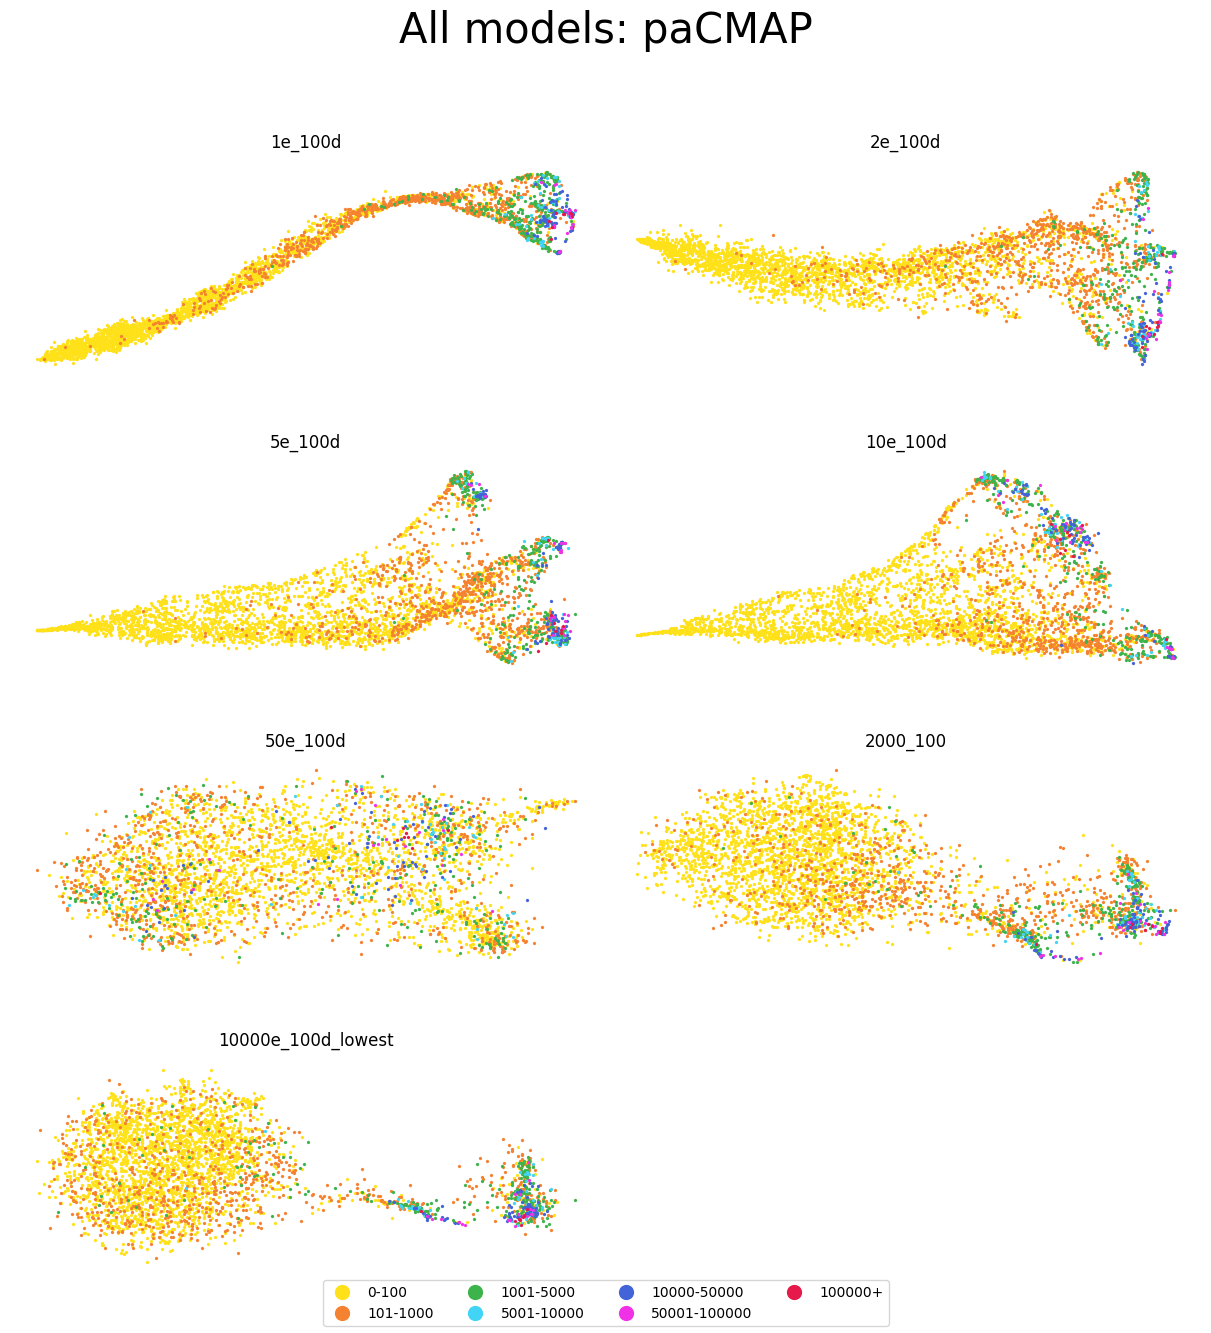

In [126]:
# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
#color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']
#print("number of unique zips: ", num_colors)

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

# Create the plots
fig, ax = plt.subplots(4, 2, figsize=(12, 12), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_1_100, proj_2_100, proj_5_100, proj_10_100, proj_50_100, proj_2000_100, proj_10000_100_lowest]  # Use xs to select different dimensionality reduction results
ts = ["1e_100d", "2e_100d", "5e_100d","10e_100d", "50e_100d", "2000_100", "10000e_100d_lowest"]
s = 0
fig.delaxes(ax[3, 1])

for row in ax:
    for col in row:
        try:
            col.set_title(ts[s], fontsize=12, pad=10)
            for current_count_code in unique_count_codes:
                relevant_addresses = []
                for address, count_code in address_cluster_count.items():
                    if address in journey_ids:
                        if current_count_code == count_code:
                            relevant_addresses.append(address)

                relevant_journeys_count = [journey_id for journey_id in relevant_addresses]
                col.scatter(
                    [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_count],
                    [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_count],
                    lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
                )
            #  # Add labels to stations makes it impossible to read 
            #     for journey_id in relevant_journeys_zip:
            #         x_coord = xs[s][journey_idx[journey_id]][0]
            #         y_coord = xs[s][journey_idx[journey_id]][1]
            #         col.text(x_coord, y_coord, journey_id, fontsize=8)  # Adjust fontsize as needed
                
            s += 1
            col.axis('off')
        except IndexError:
            continue


# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=12, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4)
fig.suptitle('All models: paCMAP', fontsize=30, y=1.1)
plt.show()


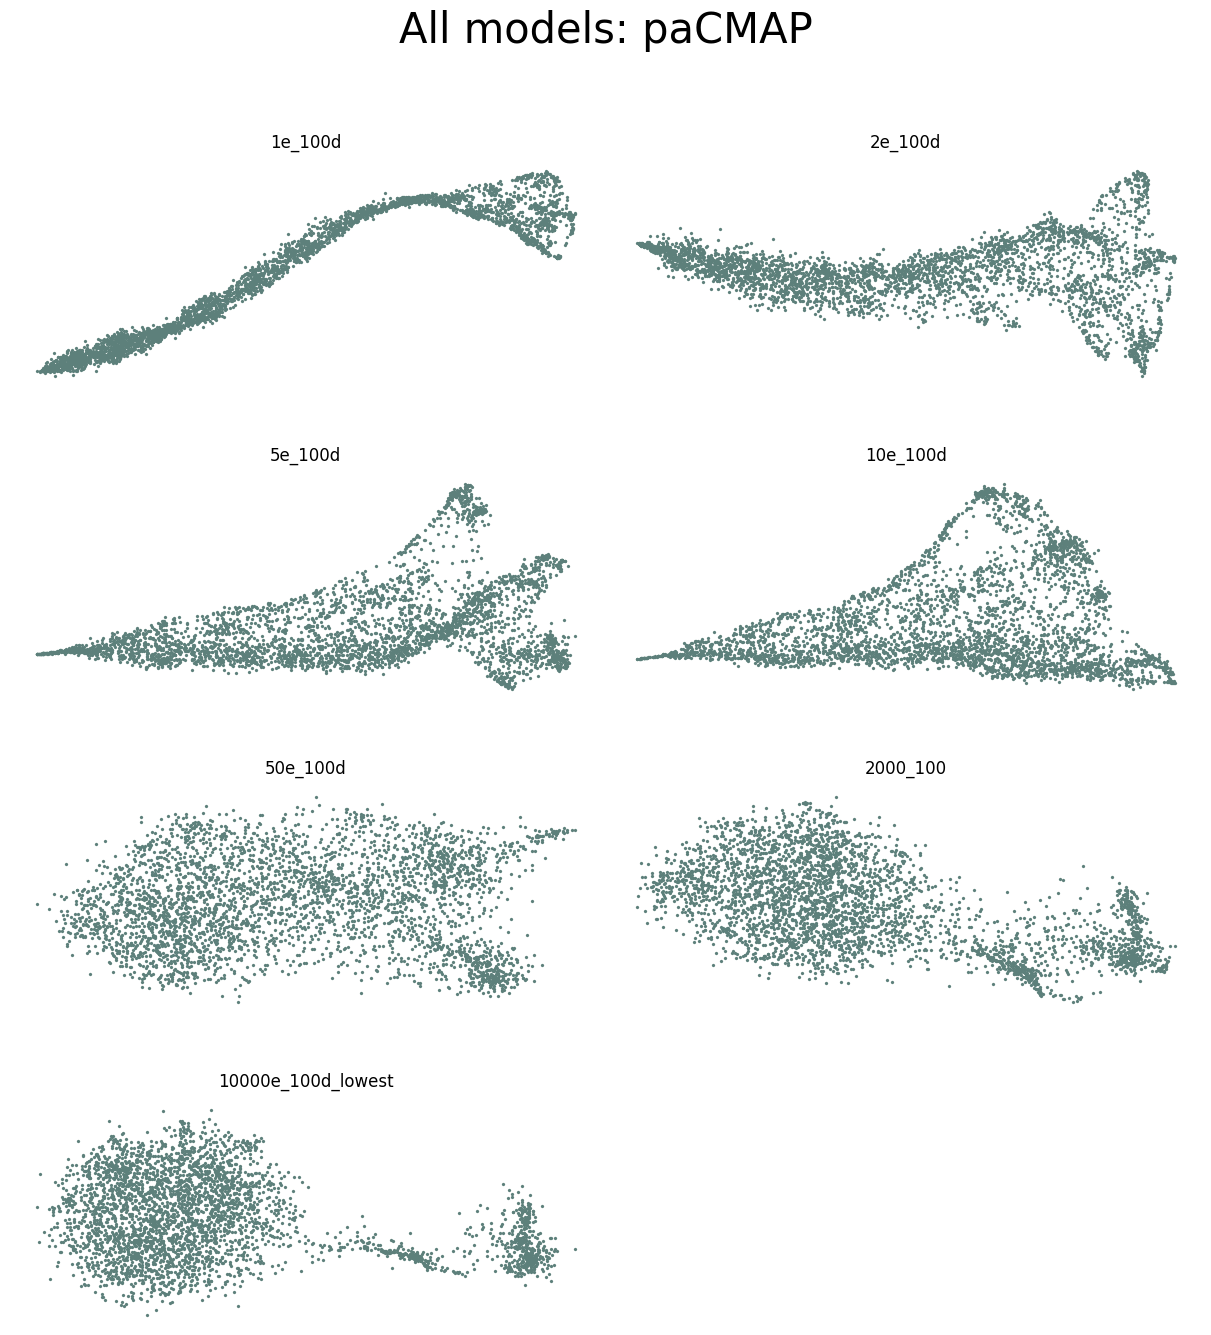

In [127]:
# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
#color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']
#print("number of unique zips: ", num_colors)

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

# Create the plots
fig, ax = plt.subplots(4, 2, figsize=(12, 12), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_1_100, proj_2_100, proj_5_100, proj_10_100, proj_50_100, proj_2000_100, proj_10000_100_lowest]  # Use xs to select different dimensionality reduction results
ts = ["1e_100d", "2e_100d", "5e_100d","10e_100d", "50e_100d", "2000_100", "10000e_100d_lowest"]
s = 0
fig.delaxes(ax[3, 1])

for row in ax:
    for col in row:
        try:
            col.set_title(ts[s], fontsize=12, pad=10)
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in journey_ids],
                [xs[s][journey_idx[journey_id]][1] for journey_id in journey_ids],
                lw=0.1, s=5, label=current_count_code, c='#5D807B'
            )
            s += 1
            col.axis('off')
        except IndexError:
            continue


# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=12, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.suptitle('All models: paCMAP', fontsize=30, y=1.1)
plt.show()


# PARAMS NEIGHBORS

In [128]:
X10 = model.wv.vectors
embedding_x10 = pacmap.PaCMAP(n_components=2, n_neighbors=5, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_5 = embedding_x10.fit_transform(X10, init="pca")

X11 = model.wv.vectors
embedding_x11 = pacmap.PaCMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_10 = embedding_x11.fit_transform(X11, init="pca")

X12 = model.wv.vectors
embedding_x12 = pacmap.PaCMAP(n_components=2, n_neighbors=15, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_15 = embedding_x12.fit_transform(X12, init="pca")

X13 = model.wv.vectors
embedding_x13 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_20 = embedding_x13.fit_transform(X13, init="pca")

X14 = model.wv.vectors
embedding_x14 = pacmap.PaCMAP(n_components=2, n_neighbors=30, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_30 = embedding_x14.fit_transform(X14, init="pca")

X15 = model.wv.vectors
embedding_x15 = pacmap.PaCMAP(n_components=2, n_neighbors=40, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_40 = embedding_x15.fit_transform(X15, init="pca")


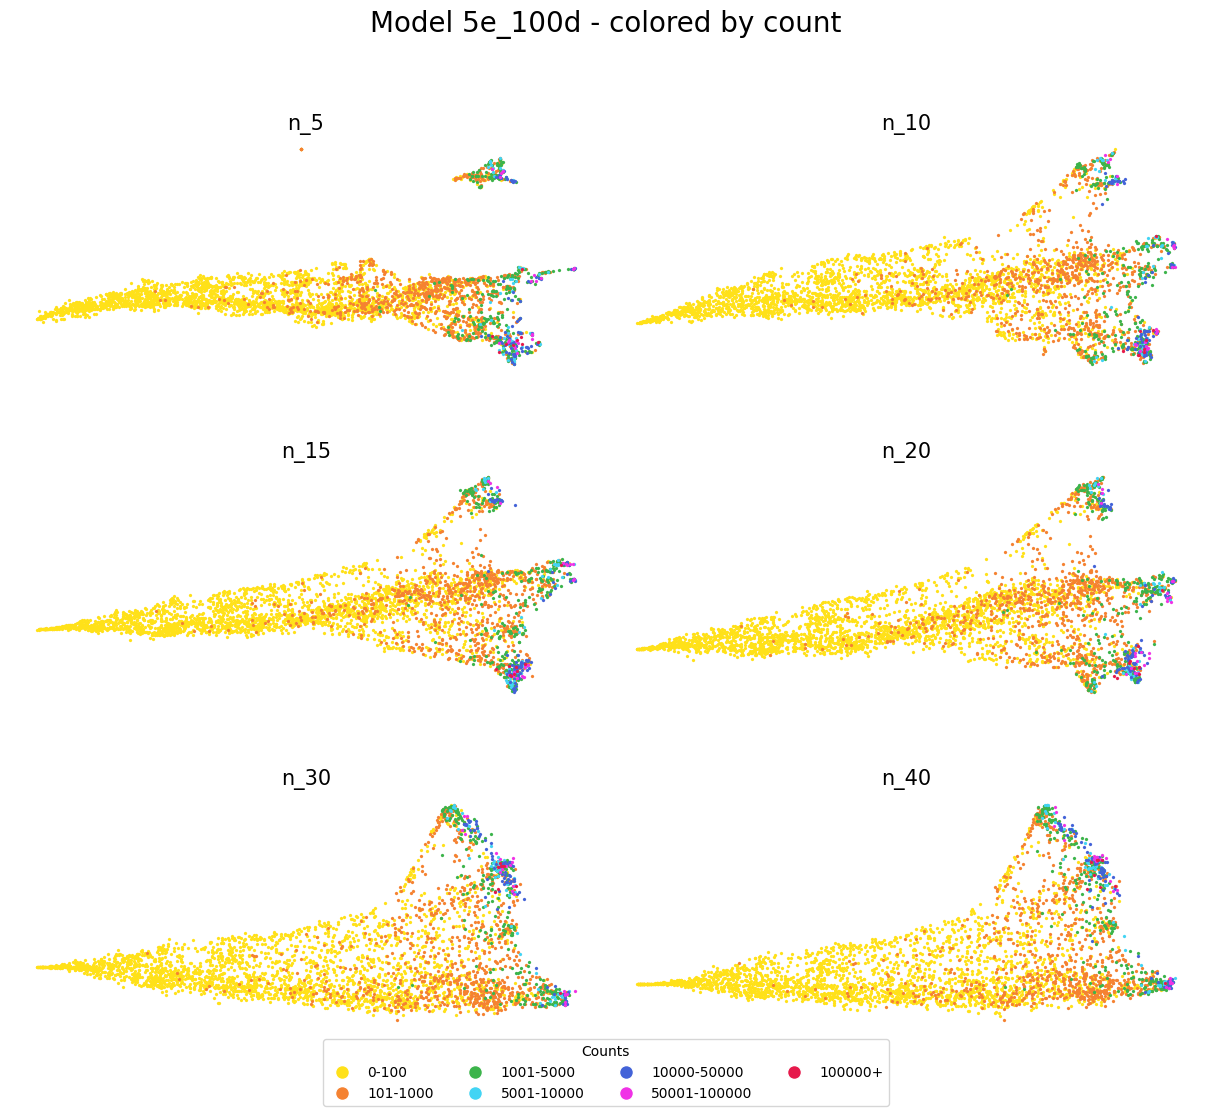

In [129]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(3, 2, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_n_5, proj_n_10, proj_n_15, proj_n_20, proj_n_30, proj_n_40]  # Use xs to select different dimensionality reduction results
ts = ["n_5", "n_10", "n_15", "n_20", "n_30", "n_40"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=15)

        for current_count_code in unique_count_codes:
            relevant_addresses = []
            for address, count_code in address_cluster_count.items():
                if address in journey_ids:
                    if current_count_code == count_code:
                        relevant_addresses.append(address)

            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
            )  
        s += 1
        col.axis('off')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


# WHAT ARE THE 3 CHICKENTOES?

In [130]:
import plotly.express as px
import pandas as pd

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Create the scatter plot using Plotly Express
#fig = px.scatter(df, x='Dimension 1', y='Dimension 2', hover_data={'Station Name': True}, text=station_names)
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', hover_data={'Station Name': True})

# Customize the size and color of the points
fig.update_traces(marker=dict(size=5,  # Adjust the size of the points as needed
                               color='#5D807B',  # Change the color of the points
                               opacity=1.0),  # Adjust the opacity of the points
                  selector=dict(mode='markers'))

# Update the layout if needed
fig.update_layout(
    title="PaCMAP Visualization",
    xaxis_title="Dimension 1",
    yaxis_title="Dimension 2",
    height=800  # Set the height of the plot (in pixels)

)




# Show the plot
fig.show()


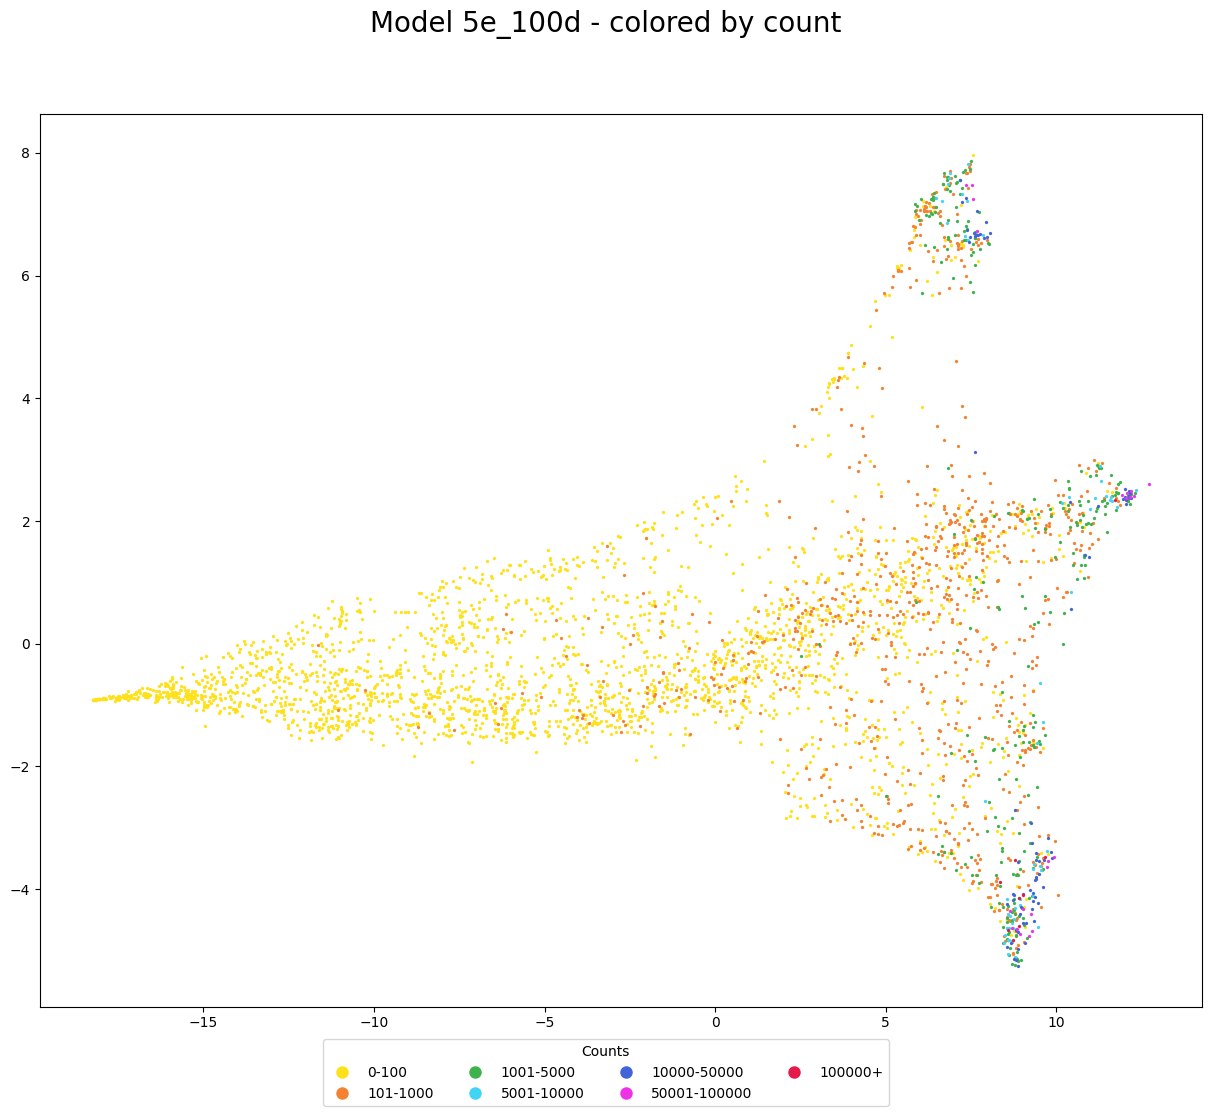

In [131]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(1, 1, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})


for current_count_code in unique_count_codes:
    relevant_addresses = []
    for address, count_code in address_cluster_count.items():
        if address in journey_ids:
            if current_count_code == count_code:
                relevant_addresses.append(address)

    relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
        lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
    )

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


In [132]:
import plotly.express as px
import pandas as pd

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Create the scatter plot using Plotly Express and color by count
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', color='Station Name', 
                 hover_data={'Station Name': True},
                 color_discrete_map=count_colors)  # Use the color palette

# Customize the size of the points
fig.update_traces(marker=dict(size=5, opacity=1.0), selector=dict(mode='markers'))

# Update the layout if needed
fig.update_layout(
    title="PaCMAP Visualization",
    xaxis_title="Dimension 1",
    yaxis_title="Dimension 2",
    height=800  # Set the height of the plot (in pixels)
)

# Show the plot
fig.show()


In [164]:
import plotly.express as px
import pandas as pd
import math

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

#add colors to all stations based on there similiarity to kbh
df['Sim'] = df['Station Name'].map(kbh_to_sim)

# Create the scatter plot using Plotly Express and color by sim
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', color='Sim', 
                 hover_data={'Station Name': True}, color_continuous_scale='YlOrRd')  # Use the color palette

# Customize the size of the points
fig.update_traces(marker=dict(size=5, opacity=1.0), selector=dict(mode='markers'))

# Update the layout if needed
fig.update_layout(
    title="PaCMAP Visualization",
    height=800,  # Set the height of the plot (in pixels)
    coloraxis_colorbar=dict(
        title="Similarity",
        tickvals=[low_value, 0, high_value],  # Custom tick values
        ticktext=[math.trunc(low_value), high_value],  # Custom tick labels
    )
)


# Show the plot
fig.show()


In [150]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
print(unique_count_codes)
num_colors = len(unique_count_codes)
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']
#color_palette = ['gold', 'tomato', 'limegreen', 'deepskyblue', 'royalblue', 'orchid', 'crimson']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]  # Use modulo to cycle through the color palette

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Map addresses to counts
address_counts = {address: address_cluster_count[address] for address in journey_ids}
df['Count'] = df['Station Name'].map(address_counts)

# Map counts to colors
df['Color'] = df['Count'].map(count_colors)
# Create traces for each unique color

import plotly.graph_objects as go

# Create traces for each unique color
legend_traces = []
for count_code, color in count_colors.items():
    # Filter DataFrame to include only rows with the current count_code
    filtered_df = df[df['Count'] == count_code]
    # Create a scatter trace for this color
    trace = go.Scatter(
        x=filtered_df['Dimension 1'],
        y=filtered_df['Dimension 2'],
        mode='markers',
        marker=dict(color=color),
        name=str(count_code),  # Use count_code as legend label
        hoverinfo='text',  # Show text on hover
        text=filtered_df['Station Name'] + ' (' + filtered_df['Count'].astype(str) + ')',  # Concatenate station name and count
    )
    legend_traces.append(trace)

# Add the scatter traces to the figure
fig = go.Figure(data=legend_traces)

# Update the layout
fig.update_layout(
    title="PaCMAP Visualization",
    height=800,  # Set the height of the plot (in pixels)
    xaxis_title="Dimension 1",
    yaxis_title="Dimension 2",
)

# Show the plot
fig.show()



[100, 1000, 5000, 10000, 50000, 100000, 100001]


In [159]:
import plotly.express as px
import pandas as pd
import math

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Count from map address_cluster_count that maps each address to the count intervals
df['Count'] = df['Station Name'].map(address_cluster_count)

# Sim to Kbh from map kbh_to_sim that maps address to its similarity to Kbh
df['Sim'] = df['Station Name'].map(kbh_to_sim)
df['Zip'] = df['Station Name'].map(modified_address_cluster_zips)
df

Dimension 1  Dimension 2                Station Name   Count       Sim  \
0        8.773566    -3.524781                 København H  100001  1.000000   
1        7.563038     7.971119                  Borrebyvej     100  0.319155   
2        8.572953    -4.831252              Hulgårds Plads   10000  0.333351   
3        8.945695    -4.722869  Islands Brygge St. (Metro)  100000  0.488555   
4        9.678488    -3.483192         København H (Metro)  100001  0.612470   
...           ...          ...                         ...     ...       ...   
3746   -14.085666    -1.117804               Sydstrandsvej     100  0.343112   
3747   -15.894335    -0.685576                  Pildamsvej     100  0.245796   
3748   -13.481542    -1.023560                   Poppelhøj     100  0.288901   
3749   -17.284365    -0.820139        CBS Handelshøjskolen     100  0.426355   
3750   -16.553835    -0.741186              Grønnegårdsvej     100  0.379231   

       Zip  
0     1000  
1     1000  
2     1000  
3     1000  
4     1000  
...    ...  
3746  2300  
3747  2600  
3748   NaN  
3749   NaN  
3750   NaN  

[3751 rows x 6 columns]

#### Top

In [161]:
# Filter the DataFrame based on the conditions
filtered_df_top = df[(df['Dimension 1'] >= 6.0) & (df['Dimension 1'] <= 9.0) & 
                     (df['Dimension 2'] >= 6.0) & (df['Dimension 2'] <= 8.0) &
                     (df['Count'] >= 10000)].sort_values('Count', ascending=False)

# Select the desired columns after filtering
filtered_top = filtered_df_top[['Dimension 1', 'Dimension 2', 'Station Name', 'Count', 'Sim', 'Zip']]
filtered_top

Dimension 1  Dimension 2                     Station Name   Count  \
113     7.660211     6.723570         Marmorkirken St. (Metro)  100000   
33      7.362377     7.481986                     Nordhavn St.  100000   
128     7.553947     7.256227              Øresund St. (Metro)  100000   
124     7.532152     7.470809  Københavns Lufthavn St. (Metro)  100000   
119     7.935410     6.880194        Amager Strand St. (Metro)   50000   
241     7.387503     6.746819                       Teglholmen   50000   
194     7.428308     6.546155                        Husum St.   50000   
183     7.344051     7.269233                 Frederiks Brygge   50000   
296     7.463060     6.636482                      Alliancevej   50000   
140     7.179471     7.552758                    Flintholm St.   50000   
15      7.692567     6.669899                         Kapelvej   50000   
120     7.767350     6.683112                     Tivoli Hotel   50000   
5       7.637579     6.665864   Frederiksberg Allé St. (Metro)   50000   
104     7.579914     6.698787                Gammel Strand St.   50000   
101     7.221253     7.207294                    Trianglen St.   50000   
90      7.891466     6.607234                   Zoologisk Have   50000   
73      7.678686     7.053657        Skjolds Plads St. (Metro)   50000   
63      7.611902     6.639520                   Vestamager St.   50000   
39      7.960158     6.624624                        Forum St.   50000   
32      8.047189     6.687386                   Vesterport St.   50000   
280     6.484079     7.272365               Lergravsparken St.   10000   
305     7.244232     7.333831                       Kingosgade   10000   
317     7.318525     6.639978                  Vesterbros Torv   10000   
295     6.793973     6.853858                  Amagerfælledvej   10000   
284     6.874154     7.679879                   Ørestad/Sundby   10000   
126     7.650991     6.672292             Dragør Stationsplads   10000   
254     7.418491     6.576054                      Englandsvej   10000   
249     6.656258     7.216506                    Amagerbrogade   10000   
248     6.838840     7.589200                       Galionsvej   10000   
144     6.825666     7.492167                      Refshalevej   10000   
49      7.380908     7.212739                       Arsenaløen   10000   
27      7.855331     6.659501                       Sjælør St.   10000   
462     7.398489     7.819852                 H.C. Ørsteds Vej   10000   

          Sim   Zip  
113  0.377311  1000  
33   0.507531  1000  
128  0.381213   NaN  
124  0.347411   NaN  
119  0.461042   NaN  
241  0.355661  1000  
194  0.389981   NaN  
183  0.397421  1000  
296  0.349426  1000  
140  0.421263  1000  
15   0.323301  1000  
120  0.443382  1000  
5    0.436926   NaN  
104  0.424455   NaN  
101  0.307741  1000  
90   0.336789  1000  
73   0.381797  1000  
63   0.309018  2300  
39   0.410347   NaN  
32   0.521456  1000  
280  0.341140  1000  
305  0.424930  1000  
317  0.581390  1000  
295  0.349865  2300  
284  0.279235   NaN  
126  0.272015  2300  
254  0.249484  2300  
249  0.396973  2300  
248  0.367399  1000  
144  0.275014  1000  
49   0.419269  1000  
27   0.324124  1000  
462  0.386799   NaN

#### MIDDLE

In [162]:
# Filter the DataFrame based on the conditions
filtered_df_middle = df[(df['Dimension 1'] >= 10.0) & (df['Dimension 1'] <= 13.0) & 
                     (df['Dimension 2'] >=0.0) & (df['Dimension 2'] <= 4.0) &
                     (df['Count'] >= 10000)].sort_values('Count', ascending=False)

filtered_middle = filtered_df_middle[['Dimension 1', 'Dimension 2', 'Station Name', 'Count', 'Sim', 'Zip']]
# Select the desired columns after filtering
filtered_middle

Dimension 1  Dimension 2                        Station Name   Count  \
121    11.709765     2.348126               Amagerbro St. (Metro)  100001   
51     12.053076     2.372266          Lergravsparken St. (Metro)  100000   
18     12.171296     2.397215                              Nyhavn  100000   
72     12.193678     2.489332                       Rådhuspladsen  100000   
57     12.277061     2.413435                 Ørestad St. (Metro)  100000   
13     11.915558     2.423163                      Dybbølsbro St.  100000   
43     12.058372     2.456869               Nørreport St. (Metro)  100000   
42     12.711660     2.606632            Bella Center St. (Metro)  100000   
105    12.125584     2.489843                    Ny Ellebjerg St.   50000   
386    11.225656     2.242412                       Vesterbrogade   50000   
358    10.432600     0.570882                  Sundby St. (Metro)   50000   
332    10.837788     1.445099                 Otto Mønsteds Plads   50000   
319    10.397877     2.310618                     Svanemøllen St.   50000   
52     12.042641     2.281255                      Skt. Annæ Gade   50000   
125    12.017249     2.528403                 DR Byen St. (Metro)   50000   
108    12.032616     2.348225                  Christianshavn St.   50000   
186    11.952775     2.363053                         Sydhavn St.   50000   
100    12.149177     2.454968                  Nørre Farimagsgade   50000   
71     12.123617     2.378590                  Sundbyvester Plads   50000   
94     12.159745     2.395889                          Tårnby St.   50000   
75     12.185647     2.378517                       Ravnsborggade   50000   
55     12.142273     2.407974  Poul Henningsens Plads St. (Metro)   50000   
66     12.017897     2.397120                 Femøren St. (Metro)   50000   
96     10.964569     1.408972                 Kastrup St. (Metro)   50000   
36     12.134419     2.407442                        Polititorvet   50000   
444    11.449433     2.412130                  Frederiksberg Allé   10000   
432    10.376262     2.386194                       Mitchellsgade   10000   
411    10.151168     2.300963                           Århusgade   10000   
391    11.305359     2.653451                              Børsen   10000   
363    11.144217     2.376312                 Vester Farimagsgade   10000   
299    11.282365     2.902687                      København/City   10000   
297    11.572852     2.345537                       Sjællandsgade   10000   
291    11.609443     2.389459                    Bella Center St.   10000   
287    11.617720     2.334354                       Tårnby/Dragør   10000   
242    11.782018     2.223066                     Fabrikmestervej   10000   
212    10.977204     2.193900                    Korsvejens Skole   10000   
158    12.123803     2.469203                       Margretheholm   10000   
30     12.348562     2.500494                          Sønderport   10000   
461    10.418634     0.836157                  Ørestads Boulevard   10000   

          Sim   Zip  
121  0.450990  1000  
51   0.365579  1000  
18   0.420336  1000  
72   0.532820  1000  
57   0.352232  2300  
13   0.462050  1000  
43   0.446904  1000  
42   0.415906  2300  
105  0.361609  2300  
386  0.471743  1000  
358  0.393300   NaN  
332  0.423142  1000  
319  0.383610  1000  
52   0.363755  1000  
125  0.360413  1000  
108  0.440080  1000  
186  0.265857  1000  
100  0.326773  1000  
71   0.328222  2300  
94   0.286464  2300  
75   0.339303  1000  
55   0.392662  1000  
66   0.387076  2300  
96   0.260251  2300  
36   0.454766  1000  
444  0.413423  1000  
432  0.391539  1000  
411  0.302678  1000  
391  0.352401  1000  
363  0.535510  1000  
299  0.308451  1000  
297  0.400310  1000  
291  0.410984  2300  
287  0.290688   NaN  
242  0.341933  1000  
212  0.241945  2300  
158  0.345558  1000  
30   0.425752   NaN  
461  0.416642  2300

#### BOTTOM

In [163]:
# Filter the DataFrame based on the conditions
filtered_df_bottom = df[(df['Dimension 1'] >= 7.5) & (df['Dimension 1'] <= 10.0) & 
                     (df['Dimension 2'] >=-6.0) & (df['Dimension 2'] <= 0.0) &
                     (df['Count'] >= 10000)].sort_values('Count', ascending=False)

filtered_bottom = filtered_df_bottom[['Dimension 1', 'Dimension 2', 'Station Name', 'Count', 'Sim', 'Zip']]
# Select the desired columns after filtering
filtered_bottom

Dimension 1  Dimension 2                Station Name   Count       Sim  \
0       8.773566    -3.524781                 København H  100001  1.000000   
4       9.678488    -3.483192         København H (Metro)  100001  0.612470   
6       8.729392    -4.829570               Nørreport St.  100001  0.491959   
61      8.583224    -4.671597  Christianshavn St. (Metro)  100001  0.438842   
10      8.359578    -3.877924                CPH Lufthavn  100001  0.221914   
..           ...          ...                         ...     ...       ...   
157     8.609328    -4.628325                 Øresundsvej   10000  0.399087   
48      8.741294    -4.636851                 Åmarken St.   10000  0.350196   
148     9.720122    -3.376956       Flintholm St. (Metro)   10000  0.371862   
50      8.786813    -4.310041                  Irlandsvej   10000  0.273144   
525     9.521421    -0.638403                  Husum Torv   10000  0.373718   

      Zip  
0    1000  
4    1000  
6    1000  
61   1000  
10   2300  
..    ...  
157  2300  
48   2300  
148  1000  
50   2300  
525  1000  

[91 rows x 6 columns]

__________________________________________________________________________________________________________________________________________________________

OLD

In [135]:
import plotly.express as px
import pandas as pd
import math

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Count from map address_cluster_count that maps each address to the count intervals
df['Count'] = df['Station Name'].map(address_cluster_count)

# Sim to Kbh from map kbh_to_sim that maps address to its similarity to Kbh
df['Sim'] = df['Station Name'].map(kbh_to_sim)
df['Zip'] = df['Station Name'].map(modified_address_cluster_zips)
df


Dimension 1  Dimension 2                Station Name   Count       Sim  \
0        8.773566    -3.524781                 København H  100001  1.000000   
1        7.563038     7.971119                  Borrebyvej     100  0.319155   
2        8.572953    -4.831252              Hulgårds Plads   10000  0.333351   
3        8.945695    -4.722869  Islands Brygge St. (Metro)  100000  0.488555   
4        9.678488    -3.483192         København H (Metro)  100001  0.612470   
...           ...          ...                         ...     ...       ...   
3746   -14.085666    -1.117804               Sydstrandsvej     100  0.343112   
3747   -15.894335    -0.685576                  Pildamsvej     100  0.245796   
3748   -13.481542    -1.023560                   Poppelhøj     100  0.288901   
3749   -17.284365    -0.820139        CBS Handelshøjskolen     100  0.426355   
3750   -16.553835    -0.741186              Grønnegårdsvej     100  0.379231   

       Zip  
0     1000  
1     1000  
2     1000  
3     1000  
4     1000  
...    ...  
3746  2300  
3747  2600  
3748   NaN  
3749   NaN  
3750   NaN  

[3751 rows x 6 columns]

#### top toe

In [136]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['Dimension 1'] >= 6.0) & (df['Dimension 1'] <= 9.59) & 
                 (df['Dimension 2'] >= 4.7) & (df['Dimension 2'] <= 7.8)]
filtered_df

Dimension 1  Dimension 2                    Station Name  Count  \
5        7.637579     6.665864  Frederiksberg Allé St. (Metro)  50000   
12       7.962730     6.580588                    Ryumgårdsvej   1000   
15       7.692567     6.669899                        Kapelvej  50000   
17       7.982697     6.538862                   Drechselsgade   5000   
21       8.036281     6.517762            Dronningens Tværgade   5000   
...           ...          ...                             ...    ...   
816      7.421775     7.427047                       Rosenlund   1000   
907      6.571269     5.712891      Plejehjemmet Løjtegårdsvej   1000   
929      6.499217     6.058416               V.E. Gamborgs Vej    100   
973      6.002213     6.847536                     Hermodsgade   1000   
1027     6.366546     5.690142                        Kochsvej    100   

           Sim   Zip  
5     0.436926   NaN  
12    0.271551  2300  
15    0.323301  1000  
17    0.183731  2300  
21    0.234690  1000  
...        ...   ...  
816   0.424730   NaN  
907   0.213362  2300  
929   0.340339  1000  
973   0.466734  1000  
1027  0.472338  2600  

[175 rows x 6 columns]

In [137]:
sorted_by_count = filtered_df.sort_values(by='Count', ascending=False)
sorted_by_count

Dimension 1  Dimension 2                     Station Name   Count  \
128      7.553947     7.256227              Øresund St. (Metro)  100000   
33       7.362377     7.481986                     Nordhavn St.  100000   
124      7.532152     7.470809  Københavns Lufthavn St. (Metro)  100000   
113      7.660211     6.723570         Marmorkirken St. (Metro)  100000   
5        7.637579     6.665864   Frederiksberg Allé St. (Metro)   50000   
...           ...          ...                              ...     ...   
654      6.736370     6.587262                     Høkerboderne     100   
643      7.199699     6.533484           Sankt Lukas Stiftelsen     100   
290      6.925609     6.494784                     Jernbanegade     100   
445      6.283811     7.130750                     Boeslundevej     100   
1027     6.366546     5.690142                         Kochsvej     100   

           Sim   Zip  
128   0.381213   NaN  
33    0.507531  1000  
124   0.347411   NaN  
113   0.377311  1000  
5     0.436926   NaN  
...        ...   ...  
654   0.544019  1000  
643   0.407412   NaN  
290   0.500691  1000  
445   0.237261  1000  
1027  0.472338  2600  

[175 rows x 6 columns]

In [138]:
sorted_by_sim = sorted_by_count.sort_values(by='Sim', ascending=False)
sorted_by_sim

Dimension 1  Dimension 2      Station Name  Count       Sim   Zip
597     6.109994     7.093228  Banegårdspladsen   1000  0.714777  1000
425     6.681016     7.498115        Halmtorvet   1000  0.651689  1000
490     6.384152     7.229776    Reventlowsgade   5000  0.650409  1000
317     7.318525     6.639978   Vesterbros Torv  10000  0.581390  1000
420     6.443915     7.125313        Dybbølsbro   1000  0.571307  1000
..           ...          ...               ...    ...       ...   ...
162     6.891898     7.705145         Ved Diget   1000  0.186179  2300
17      7.982697     6.538862     Drechselsgade   5000  0.183731  2300
714     7.194587     6.259383            Herlev   1000  0.160416  1000
240     7.199937     6.443167          Krimsvej   1000  0.152964  2300
199     7.026440     6.654889     Dragør Rådhus   5000  0.099921  2300

[175 rows x 6 columns]

#### Middle toe

In [139]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['Dimension 1'] >= 10.0) & (df['Dimension 1'] <= 12.5) & 
                 (df['Dimension 2'] >= 0.0) & (df['Dimension 2'] <= 4.0)]
filtered_df

Dimension 1  Dimension 2           Station Name   Count       Sim   Zip
13     11.915558     2.423163         Dybbølsbro St.  100000  0.462050  1000
18     12.171296     2.397215                 Nyhavn  100000  0.420336  1000
30     12.348562     2.500494             Sønderport   10000  0.425752   NaN
36     12.134419     2.407442           Polititorvet   50000  0.454766  1000
43     12.058372     2.456869  Nørreport St. (Metro)  100000  0.446904  1000
..           ...          ...                    ...     ...       ...   ...
663    10.364498     2.191612  Christianshavns Kanal    1000  0.502433   NaN
665    10.319683     0.846094              Foldbyvej    1000  0.262109  2300
675    10.039639     2.423693         Nordvestkirken    1000  0.295359  1000
736    10.077755     1.549793        Klampenborg St.     100  0.434625   NaN
827    10.115634     1.663672              Hørgården    5000  0.149247  1000

[162 rows x 6 columns]

In [140]:
sorted_by_count = filtered_df.sort_values(by='Count', ascending=False)
sorted_by_count

Dimension 1  Dimension 2                Station Name   Count       Sim  \
121    11.709765     2.348126       Amagerbro St. (Metro)  100001  0.450990   
13     11.915558     2.423163              Dybbølsbro St.  100000  0.462050   
51     12.053076     2.372266  Lergravsparken St. (Metro)  100000  0.365579   
18     12.171296     2.397215                      Nyhavn  100000  0.420336   
57     12.277061     2.413435         Ørestad St. (Metro)  100000  0.352232   
..           ...          ...                         ...     ...       ...   
346    10.769527     2.135048                Friheden St.     100  0.406088   
529    10.703964     1.979198           Karen Blixens Vej     100  0.399970   
492    10.076995     1.771536                    Søvænget     100  0.390049   
397    11.485423     2.482697                Havslundevej     100  0.357225   
603    10.864259     2.789094                   Farumgade     100  0.469085   

      Zip  
121  1000  
13   1000  
51   1000  
18   1000  
57   2300  
..    ...  
346  2600  
529  2300  
492   NaN  
397   NaN  
603  1000  

[162 rows x 6 columns]

In [141]:
sorted_by_sim = sorted_by_count.sort_values(by='Sim', ascending=False)
sorted_by_sim

Dimension 1  Dimension 2                      Station Name   Count  \
314    10.350591     2.157790                  Colbjørnsensgade    5000   
233    10.670858     2.113393                Prins Jørgens Gård    1000   
363    11.144217     2.376312               Vester Farimagsgade   10000   
72     12.193678     2.489332                     Rådhuspladsen  100000   
364    10.822893     1.418069          H.C. Andersens Boulevard    5000   
..           ...          ...                               ...     ...   
827    10.115634     1.663672                         Hørgården    5000   
426    10.525784     1.642543                  Peder Hjorts Vej    1000   
390    11.084027     1.961921                      Gårdfæstevej    1000   
198    12.112373     2.431645  Clarion Hotel Copenhagen Airport    5000   
322    10.783878     2.091612                           Cirklen    5000   

          Sim   Zip  
314  0.577067  1000  
233  0.541697  1000  
363  0.535510  1000  
72   0.532820  1000  
364  0.531791  1000  
..        ...   ...  
827  0.149247  1000  
426  0.136998  2300  
390  0.134109  2300  
198  0.109760  2300  
322  0.016674  2300  

[162 rows x 6 columns]

#### Bottom Toe

In [142]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['Dimension 1'] >= 6.0) & (df['Dimension 1'] <= 10.85) & 
                 (df['Dimension 2'] >= -4.53) & (df['Dimension 2'] <= -1.558)]
filtered_df

Dimension 1  Dimension 2                       Station Name   Count  \
0        8.773566    -3.524781                        København H  100001   
4        9.678488    -3.483192                København H (Metro)  100001   
8        9.353798    -4.525053             Lufthavnen St. (Metro)   50000   
10       8.359578    -3.877924                       CPH Lufthavn  100001   
11       9.764087    -3.116835                          Istedgade    1000   
...           ...          ...                                ...     ...   
1275     6.297975    -2.457015                          Valhøjvej     100   
1287     8.059415    -1.924827                         Krumtappen     100   
1390     6.438993    -3.024649                       Grønjordsvej     100   
1436     6.012669    -3.253772  CitizenM Copenhagen Radhuspladsen    1000   
1564     7.274980    -2.492047                          Skibbroen     100   

           Sim   Zip  
0     1.000000  1000  
4     0.612470  1000  
8     0.337089  2300  
10    0.221914  2300  
11    0.658431  1000  
...        ...   ...  
1275  0.352379  2300  
1287  0.405014  2300  
1390  0.346353  2300  
1436  0.485806   NaN  
1564  0.446363  1000  

[313 rows x 6 columns]

In [143]:
sorted_by_count = filtered_df.sort_values(by='Count', ascending=False)
sorted_by_count     

Dimension 1  Dimension 2                Station Name   Count       Sim  \
0        8.773566    -3.524781                 København H  100001  1.000000   
10       8.359578    -3.877924                CPH Lufthavn  100001  0.221914   
143      9.014309    -4.095871                 Ørestad St.  100001  0.277555   
45       8.908979    -4.143682  Kongens Nytorv St. (Metro)  100001  0.427843   
4        9.678488    -3.483192         København H (Metro)  100001  0.612470   
...           ...          ...                         ...     ...       ...   
528      8.900083    -2.311593           Oberst Kochs Alle     100  0.450251   
792      8.579355    -2.067973          William Wains Gade     100  0.382701   
163      9.753302    -3.422641             Sankelmarksgade     100  0.441988   
542      8.917343    -1.816322                   København     100  0.457787   
1564     7.274980    -2.492047                   Skibbroen     100  0.446363   

       Zip  
0     1000  
10    2300  
143   2300  
45    1000  
4     1000  
...    ...  
528   2300  
792   1000  
163   1000  
542   1000  
1564  1000  

[313 rows x 6 columns]

In [144]:
sorted_by_sim = sorted_by_count.sort_values(by='Sim', ascending=False)
sorted_by_sim

Dimension 1  Dimension 2         Station Name   Count       Sim   Zip
0       8.773566    -3.524781          København H  100001  1.000000  1000
797     6.899823    -3.404277         Tietgensgade    5000  0.713983  1000
111     9.328815    -4.102873      Bernstorffsgade   10000  0.693911  1000
11      9.764087    -3.116835            Istedgade    1000  0.658431  1000
167     9.485574    -3.136096            Østergade    1000  0.620593  1000
..           ...          ...                  ...     ...       ...   ...
99      9.435522    -3.736057  Grønjords Kollegiet    1000  0.178044  2300
536     8.708560    -4.370255            Skøjtevej    5000  0.175520  2300
264     8.410918    -3.373553            Kanadavej    5000  0.162118  2300
505     8.339939    -3.942062      Sundbyvestervej    5000  0.146351  2300
550     9.357016    -1.684428              Rødovre    1000  0.125237  2600

[313 rows x 6 columns]

In [145]:
from collections import Counter
locations_with_banegårdspladsen = []

for seq in sequences:
    if 'København H' in seq:
        for place in seq: 
            if place != 'København H':
                locations_with_banegårdspladsen.append(place)


# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
location_counts = Counter(locations_with_banegårdspladsen)

# Sort the counts by their keys (number of mentions), in descending order
sorted_locations_counts = sorted(location_counts.items(), key=lambda x: x[1], reverse=True)
sorted_locations_counts

[('CPH Lufthavn', 52947),
 ('Refshaleøen', 27077),
 ('Kongens Nytorv St. (Metro)', 21958),
 ('Ørestad St.', 18593),
 ('Nørreport St.', 15321),
 ('Marmorkirken St. (Metro)', 11293),
 ('Trianglen St. (Metro)', 9643),
 ('Nordhavn St.', 8447),
 ('Østerport St.', 8266),
 ('Nørrebro St.', 7211),
 ('Gammel Strand St. (Metro)', 6526),
 ('Valby St.', 6486),
 ('Amagerbro St. (Metro)', 5639),
 ('Alliancevej', 5485),
 ('Orientkaj St. (Metro)', 5413),
 ('Christianshavn St. (Metro)', 5393),
 ('Sydhavn St.', 5228),
 ('Carlsberg St.', 5092),
 ('Elmegade', 4803),
 ('Frederiksberg St. (Metro)', 4623),
 ('Bella Center St. (Metro)', 4457),
 ('Zoologisk Have', 4356),
 ('Sundbyvester Plads', 4303),
 ('Ørestad St. (Metro)', 4269),
 ('Tårnby St.', 4120),
 ('Hellerup St.', 4087),
 ('Bodenhoffs Plads', 4031),
 ('Vestamager St. (Metro)', 3971),
 ('Frederiks Brygge', 3897),
 ('Tivoli Hotel', 3883),
 ('Dybbølsbro St.', 3840),
 ('Nordhavn St. (Metro)', 3817),
 ('Lergravsparken St. (Metro)', 3760),
 ('Tycho Brahes A

In [146]:
from collections import Counter
locations_with_banegårdspladsen = []

for seq in sequences:
    if 'Amagerbro St. (Metro)' in seq:
        for place in seq: 
            if place != 'Amagerbro St. (Metro)':
                locations_with_banegårdspladsen.append(place)


# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
location_counts = Counter(locations_with_banegårdspladsen)

# Sort the counts by their keys (number of mentions), in descending order
sorted_locations_counts = sorted(location_counts.items(), key=lambda x: x[1], reverse=True)
sorted_locations_counts

[('Kongens Nytorv St. (Metro)', 9657),
 ('Nørreport St.', 9362),
 ('København H', 5639),
 ('CPH Lufthavn', 3973),
 ('Nørreport St. (Metro)', 2636),
 ('Forum St. (Metro)', 2567),
 ('Københavns Lufthavn St. (Metro)', 2212),
 ('Frederiksberg St. (Metro)', 2082),
 ('Ørestad St.', 2062),
 ('Trianglen St. (Metro)', 2018),
 ('Femøren St. (Metro)', 1705),
 ('Christianshavn St. (Metro)', 1677),
 ('Nørrebro St.', 1635),
 ('Øresund St. (Metro)', 1592),
 ('Ørestad St. (Metro)', 1521),
 ('Lufthavnen St. (Metro)', 1446),
 ('Vestamager St. (Metro)', 1385),
 ('Sundbyvester Plads', 1331),
 ('Enghave Plads St. (Metro)', 1291),
 ('Bella Center St. (Metro)', 1209),
 ('Amager Strand St. (Metro)', 1014),
 ('København H (Metro)', 993),
 ('Kastrup St. (Metro)', 963),
 ('Rådhuspladsen', 951),
 ('Vanløse St.', 942),
 ('Rådhuspladsen St. (Metro)', 928),
 ('Østerport St.', 842),
 ('Fasanvej St. (Metro)', 830),
 ('Rådhuspladsen St.', 736),
 ('Nordhavn St.', 735),
 ('Kongens Nytorv', 729),
 ('Skjolds Plads St. (Met

In [147]:
from collections import Counter
locations_with_banegårdspladsen = []

for seq in sequences:
    if 'Øresund St. (Metro)' in seq:
        for place in seq: 
            if place != 'Øresund St. (Metro)':
                locations_with_banegårdspladsen.append(place)


# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
location_counts = Counter(locations_with_banegårdspladsen)

# Sort the counts by their keys (number of mentions), in descending order
sorted_locations_counts = sorted(location_counts.items(), key=lambda x: x[1], reverse=True)
sorted_locations_counts

[('CPH Lufthavn', 9692),
 ('Københavns Lufthavn St. (Metro)', 6516),
 ('Lufthavnen St. (Metro)', 6169),
 ('Kongens Nytorv St. (Metro)', 6125),
 ('Nørreport St.', 4412),
 ('Kastrup St. (Metro)', 3370),
 ('København H', 1953),
 ('Christianshavn St. (Metro)', 1747),
 ('Amagerbro St. (Metro)', 1592),
 ('Nørreport St. (Metro)', 1331),
 ('Forum St. (Metro)', 1087),
 ('Lergravsparken St. (Metro)', 967),
 ('Frederiksberg St. (Metro)', 851),
 ('København H (Metro)', 776),
 ('Femøren St. (Metro)', 762),
 ('Københavns Lufthavn', 723),
 ('Rådhuspladsen', 721),
 ('Ørestad St.', 696),
 ('Rådhuspladsen St. (Metro)', 629),
 ('Trianglen St. (Metro)', 585),
 ('Marmorkirken St. (Metro)', 572),
 ('Kongens Nytorv', 470),
 ('Ørestad St. (Metro)', 467),
 ('Islands Brygge St. (Metro)', 451),
 ('Christianshavn St.', 443),
 ('Enghave Plads St. (Metro)', 426),
 ('Vestamager St. (Metro)', 396),
 ('Kongens Nytorv St.', 394),
 ('Nordhavn St.', 378),
 ('Nørrebro St.', 376),
 ('Gammel Strand St. (Metro)', 354),
 ('Be

## FINDINGS

- 8/9 of stations with count 100000+ are in bottom toe
- 1 is left (Amagerbro St. (Metro)) in the middle toe
- Those between 50000 and 100000 are split into all 3 toes